# Analyse Run #

This is a template notebook to browse the results of a evolution simulation.

Please _Kernel>Restart & Run All_ for every new project to make sure you start with a clean notebook.

## Import required libraries

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
from  ipywidgets import widgets 
from ipywidgets import interact, interactive, fixed
from IPython.display import display,HTML,clear_output
import os
HTML('''<script>code_show=true;function code_toggle() {if (code_show){$('div.input').hide();} else {$('div.input').show();} code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')
import phievo.AnalysisTools as AT
from  phievo.AnalysisTools.Notebook import Notebook,get_interactions

notebook = Notebook()

import phievo
from phievo.AnalysisTools import Simulation
from phievo.Networks import mutation
import random

# Create a test network

<IPython.core.display.Javascript object>


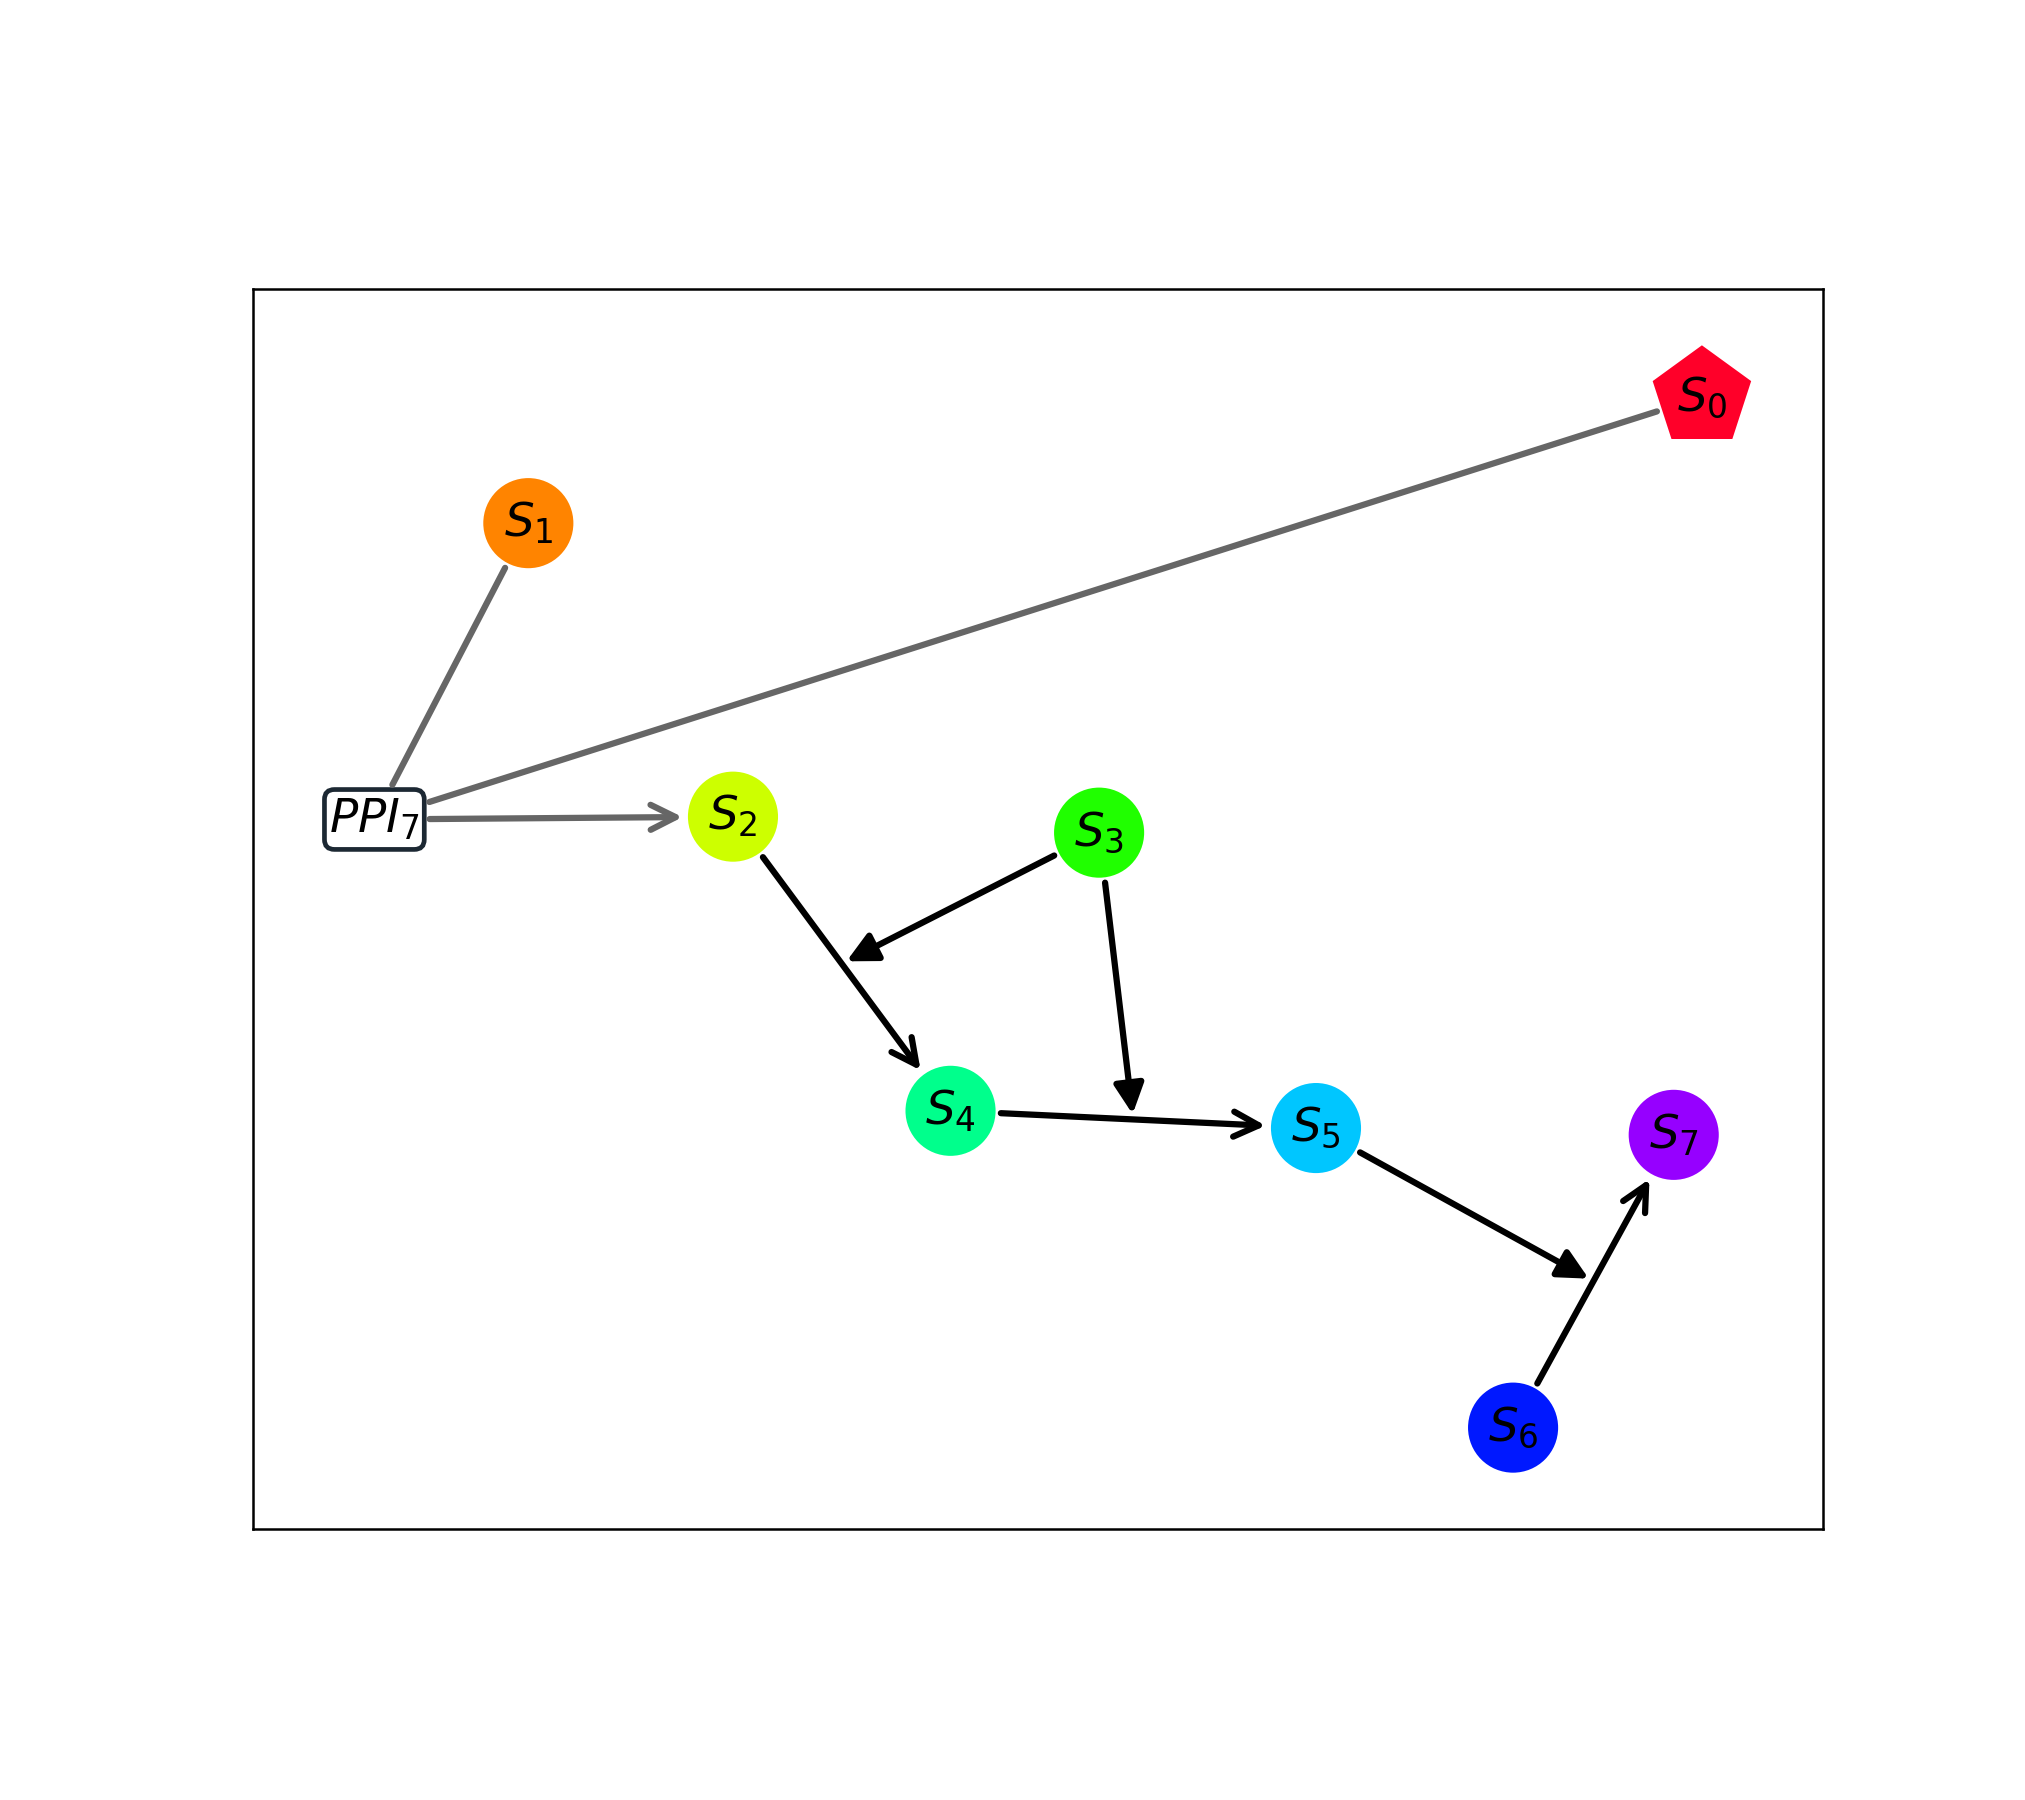

In [2]:
# Create a random generator and a network
seed = 202102721
g = random.Random(seed) # This define a new random number generator
L = mutation.Mutable_Network(g) # Create an empty network

# Let's make something that looks like a basic 2-step KPR receptor
parameters=[['Degradable',0.5]]
parameters.append(['Ligand'])
parameters.append(['Complexable'])
TM0,prom0,S0 = L.new_gene(0.5,5,parameters)

parameters=[['Degradable',0.5]]
parameters.append(['Complexable'])
parameters.append(['Phosphorylable'])
TM1,prom1,R1 = L.new_gene(0.5,5,parameters)

## Add complexation between S0 and R1.
parameters.append(['Phosphorylable'])
ppi,R2 = L.new_PPI(S0 , R1 , 2.0 , 1.0 , parameters)

# Add S3
parameters=[['Degradable',0.0]]
parameters.append(['TF',1])
parameters.append(['Kinase'])
TM3,prom3,S3 = L.new_gene(0.5,5,parameters)

## Add a phosphorylation of R5 by S3
R4,phospho = L.new_Phosphorylation(S3,R2,2.0,0.5,1.0,3)
R4.change_type("TF",[1]) # Note this is already the default value for a phosphorylated species

## Add a phosphorylation of R6 by S3
R5,phospho = L.new_Phosphorylation(S3,R4,2.0,0.5,1.0,3)
R5.change_type("TF",[1]) # Note this is already the default value for a phosphorylated species
R5.add_type(["Kinase"])

# Add S6
parameters=[['Degradable',0.5]]
parameters.append(['TF',1])
parameters.append(['Phosphorylable'])
TM6,prom6,S6 = L.new_gene(0.5,5,parameters)

## Add a phosphorylation of S6 by R5
S7,phospho = L.new_Phosphorylation(R5,S6,2.0,0.5,1.0,3)
S7.change_type("TF",[1]) # Note this is already the default value for a phosphorylated species

# Draw the network
img = L.draw()

## Define initial condition for simulation

<IPython.core.display.Javascript object>


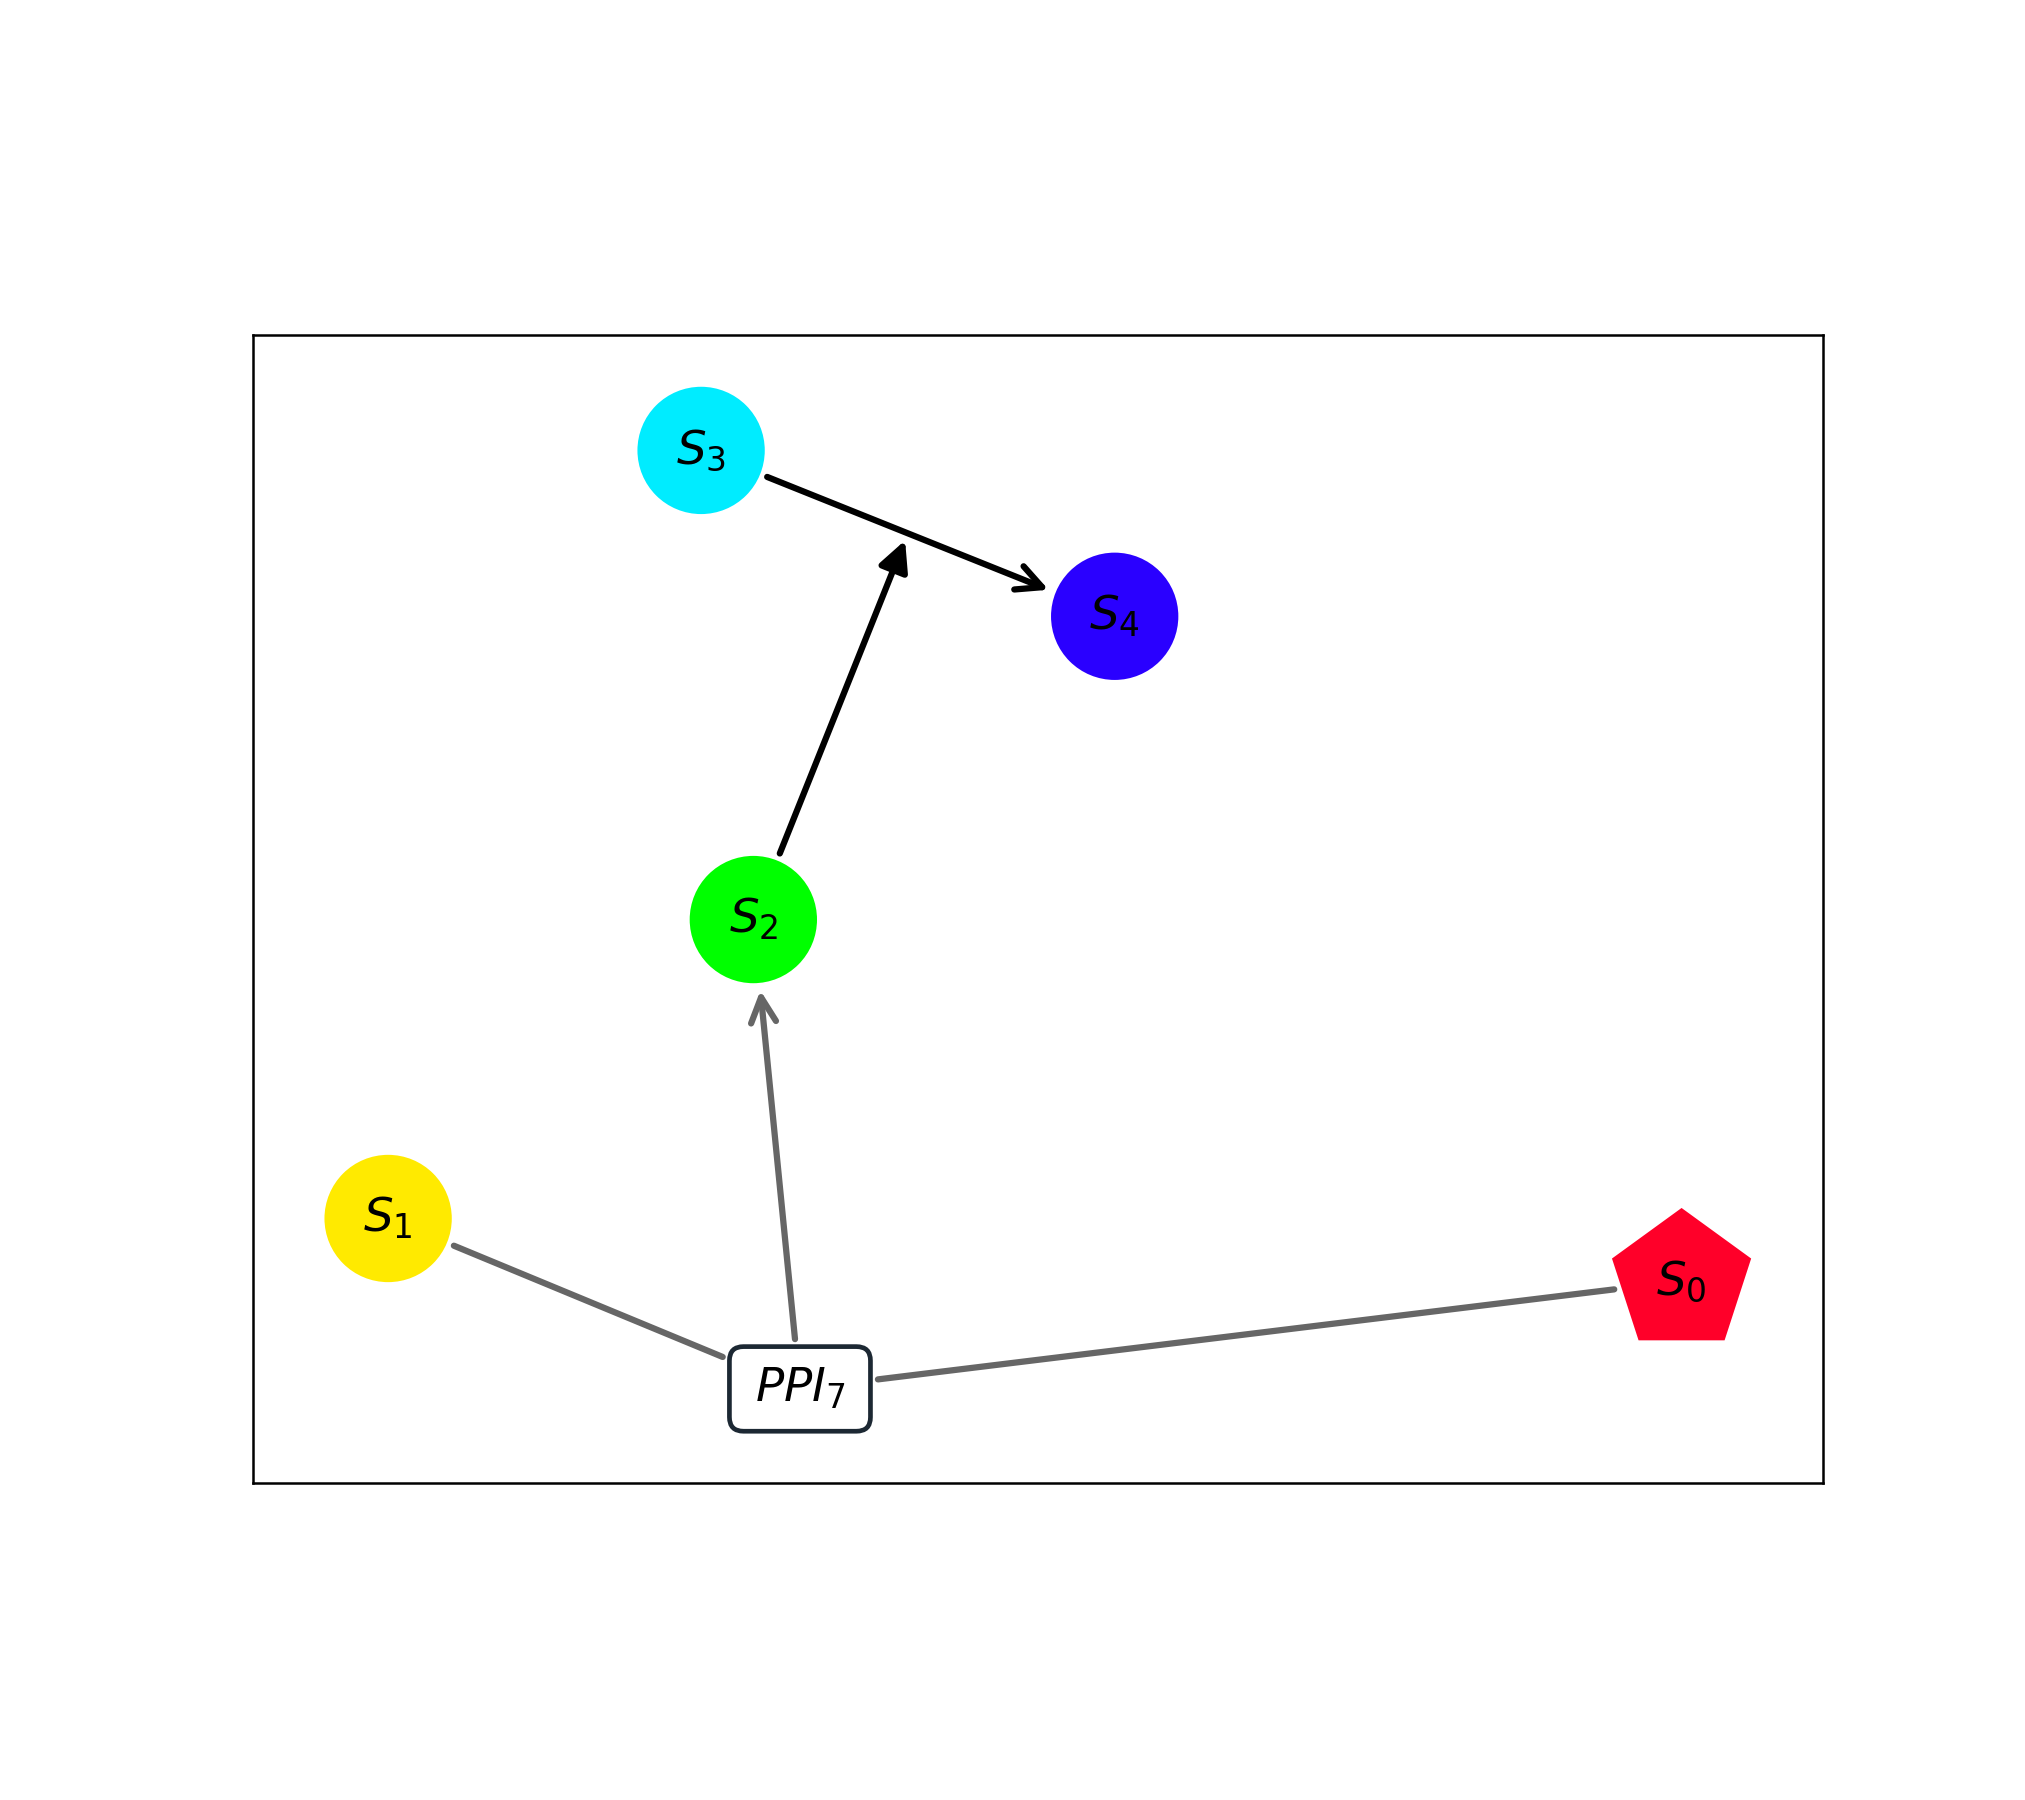

In [8]:
# Create a random generator and a network
seed = 202102721
g = random.Random(seed) # This define a new random number generator
L = mutation.Mutable_Network(g) # Create an empty network

# Let's make something that looks like a basic 2-step KPR receptor
parameters=[['Degradable',0.5]]
parameters.append(['Ligand'])
parameters.append(['Complexable'])
TM0,prom0,S0 = L.new_gene(0.5,5,parameters)

parameters=[['Degradable',0.5]]
parameters.append(['Complexable'])
parameters.append(['Phosphorylable'])
TM1,prom1,R1 = L.new_gene(0.5,5,parameters)

## Add complexation between S0 and R1.
parameters.append(['Phosphorylable'])
ppi,R2 = L.new_PPI(S0 , R1 , 2.0 , 1.0 , parameters)
R2.add_type(["Kinase"])

# Add S3
parameters=[['Degradable',0.5]]
parameters.append(['TF',1])
parameters.append(['Phosphorylable'])
TM3,prom3,S3 = L.new_gene(0.5,5,parameters)

## Add a phosphorylation of S3 by R2
S4,phospho = L.new_Phosphorylation(R2,S3,2.0,0.5,1.0,3)
S4.change_type("TF",[1]) # Note this is already the default value for a phosphorylated species

temp = L.draw()


## Get best net

In [4]:
sim = Simulation(os.getcwd())
best_net_0_150 = sim.get_best_net(0,150)

## Plot observable

In [6]:
sim.show_fitness(0)

## Plot Layout

<IPython.core.display.Javascript object>


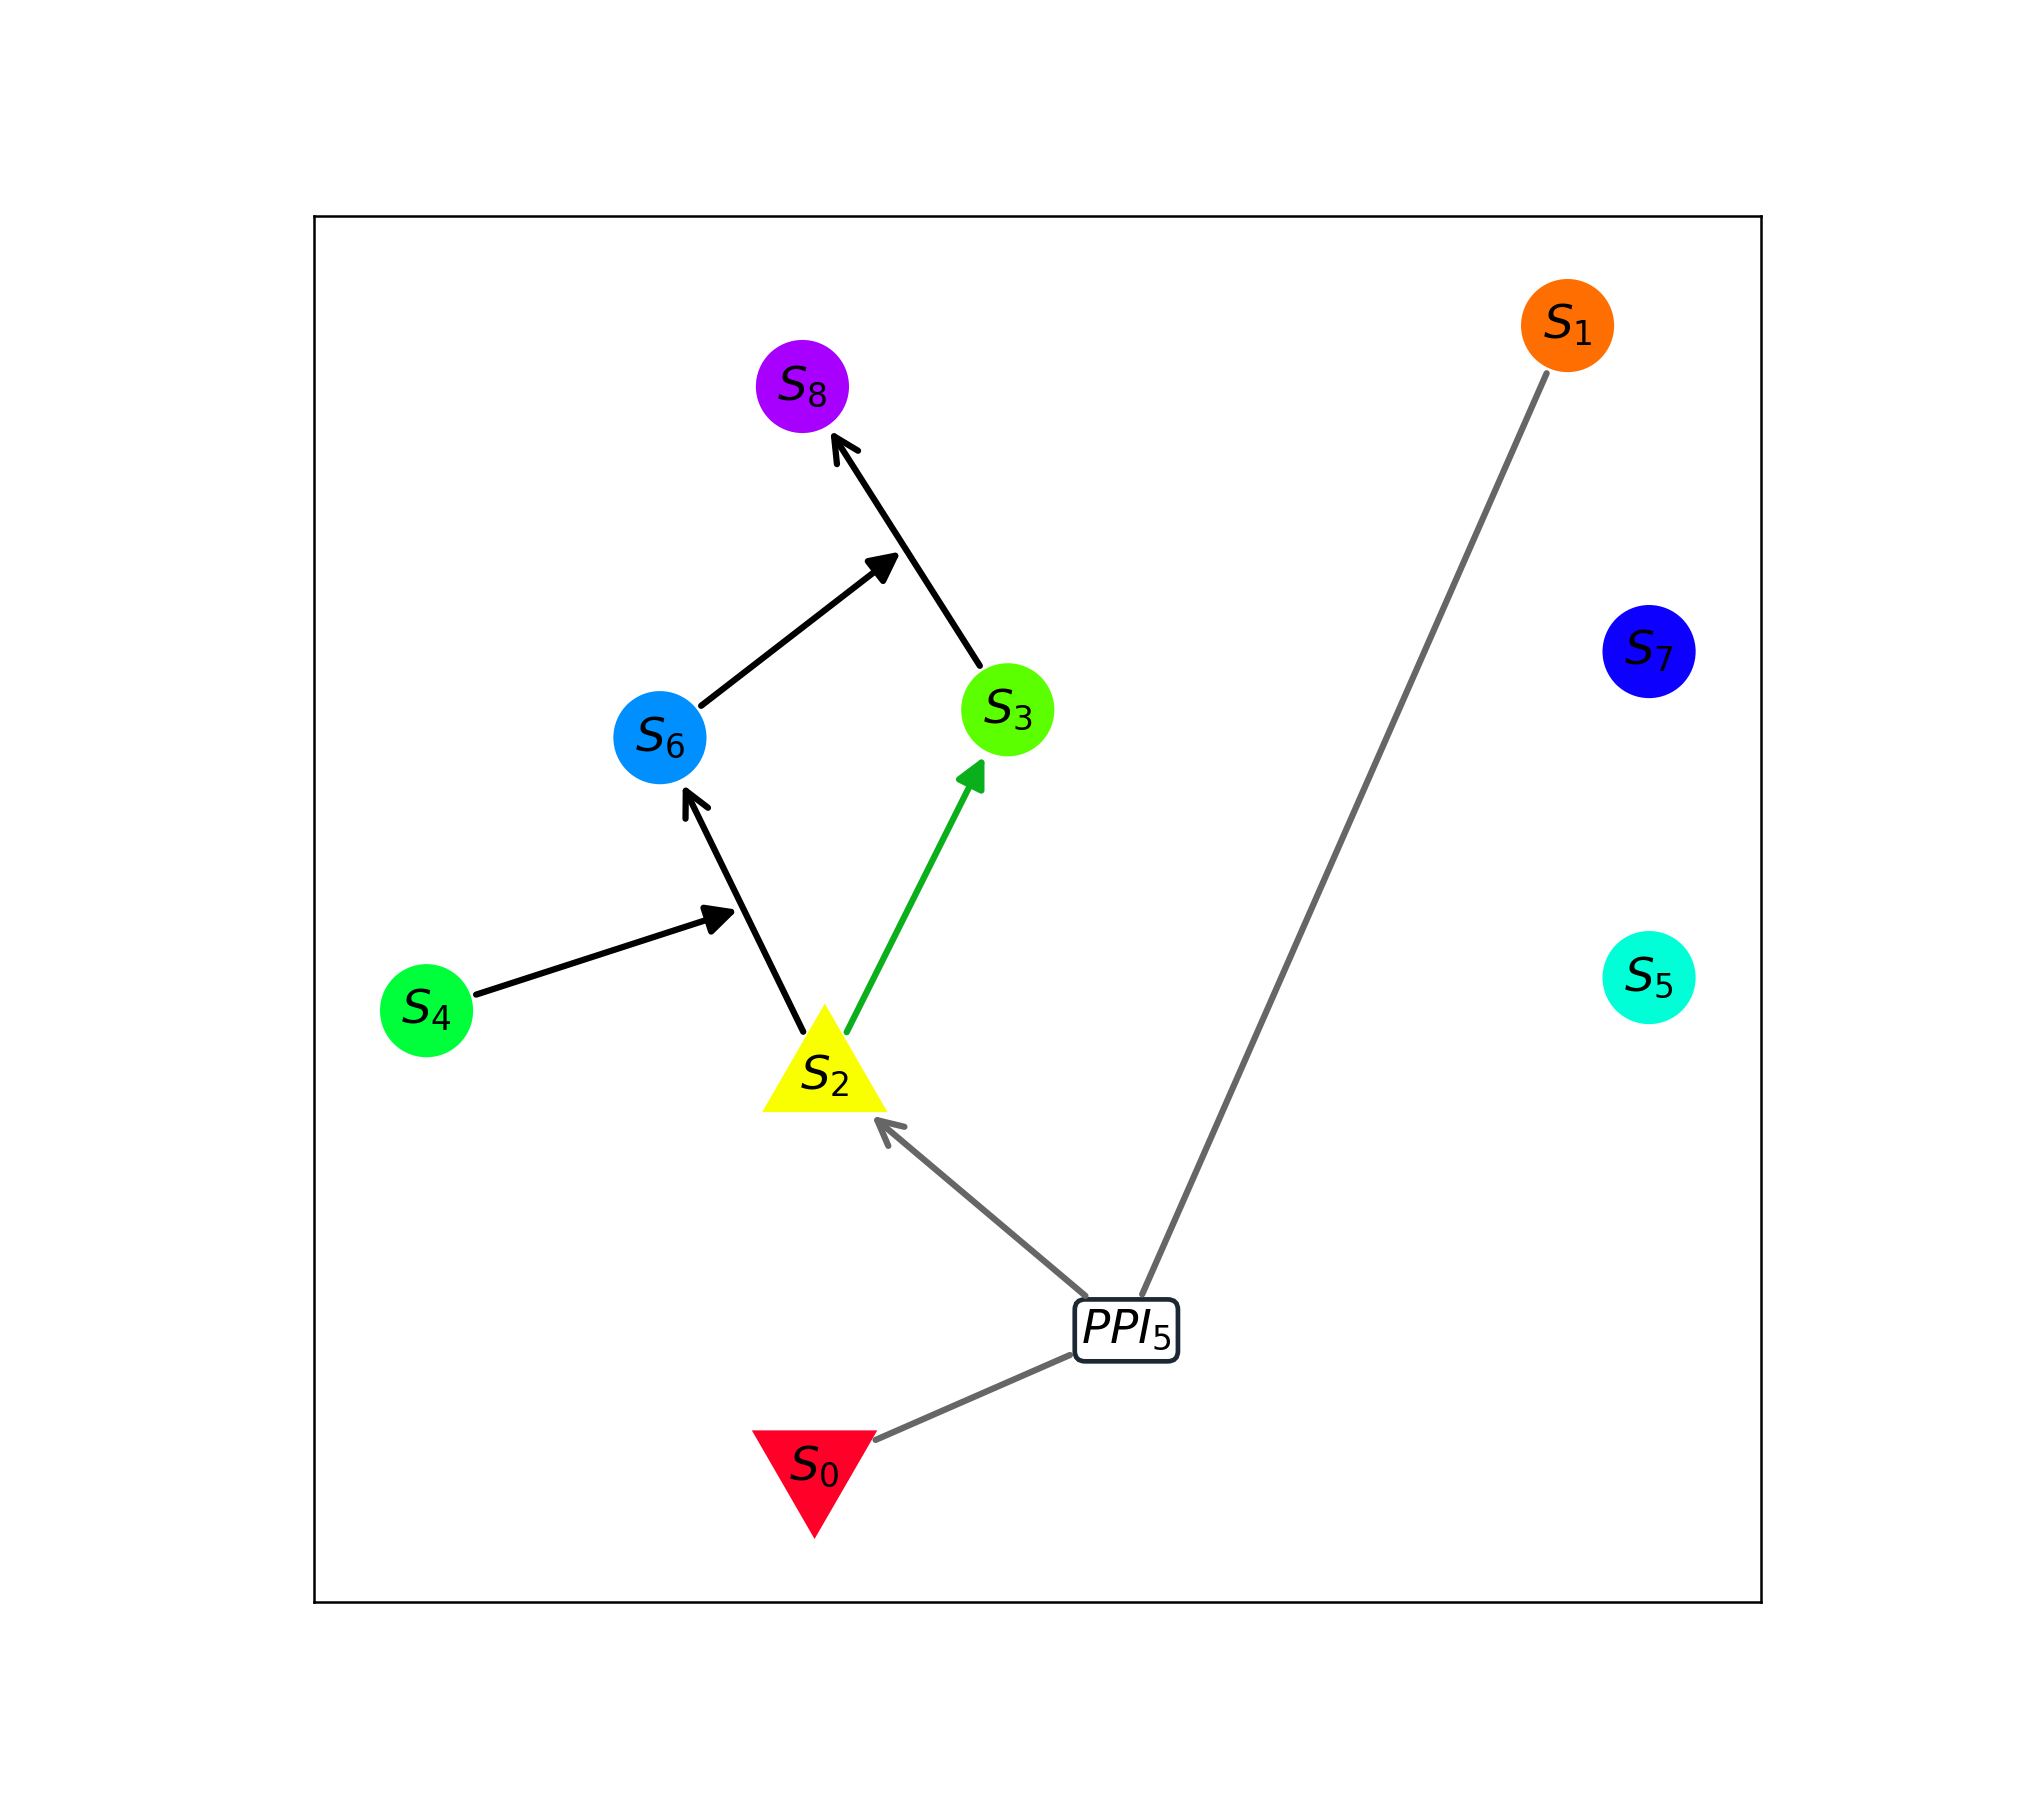

<IPython.core.display.Javascript object>


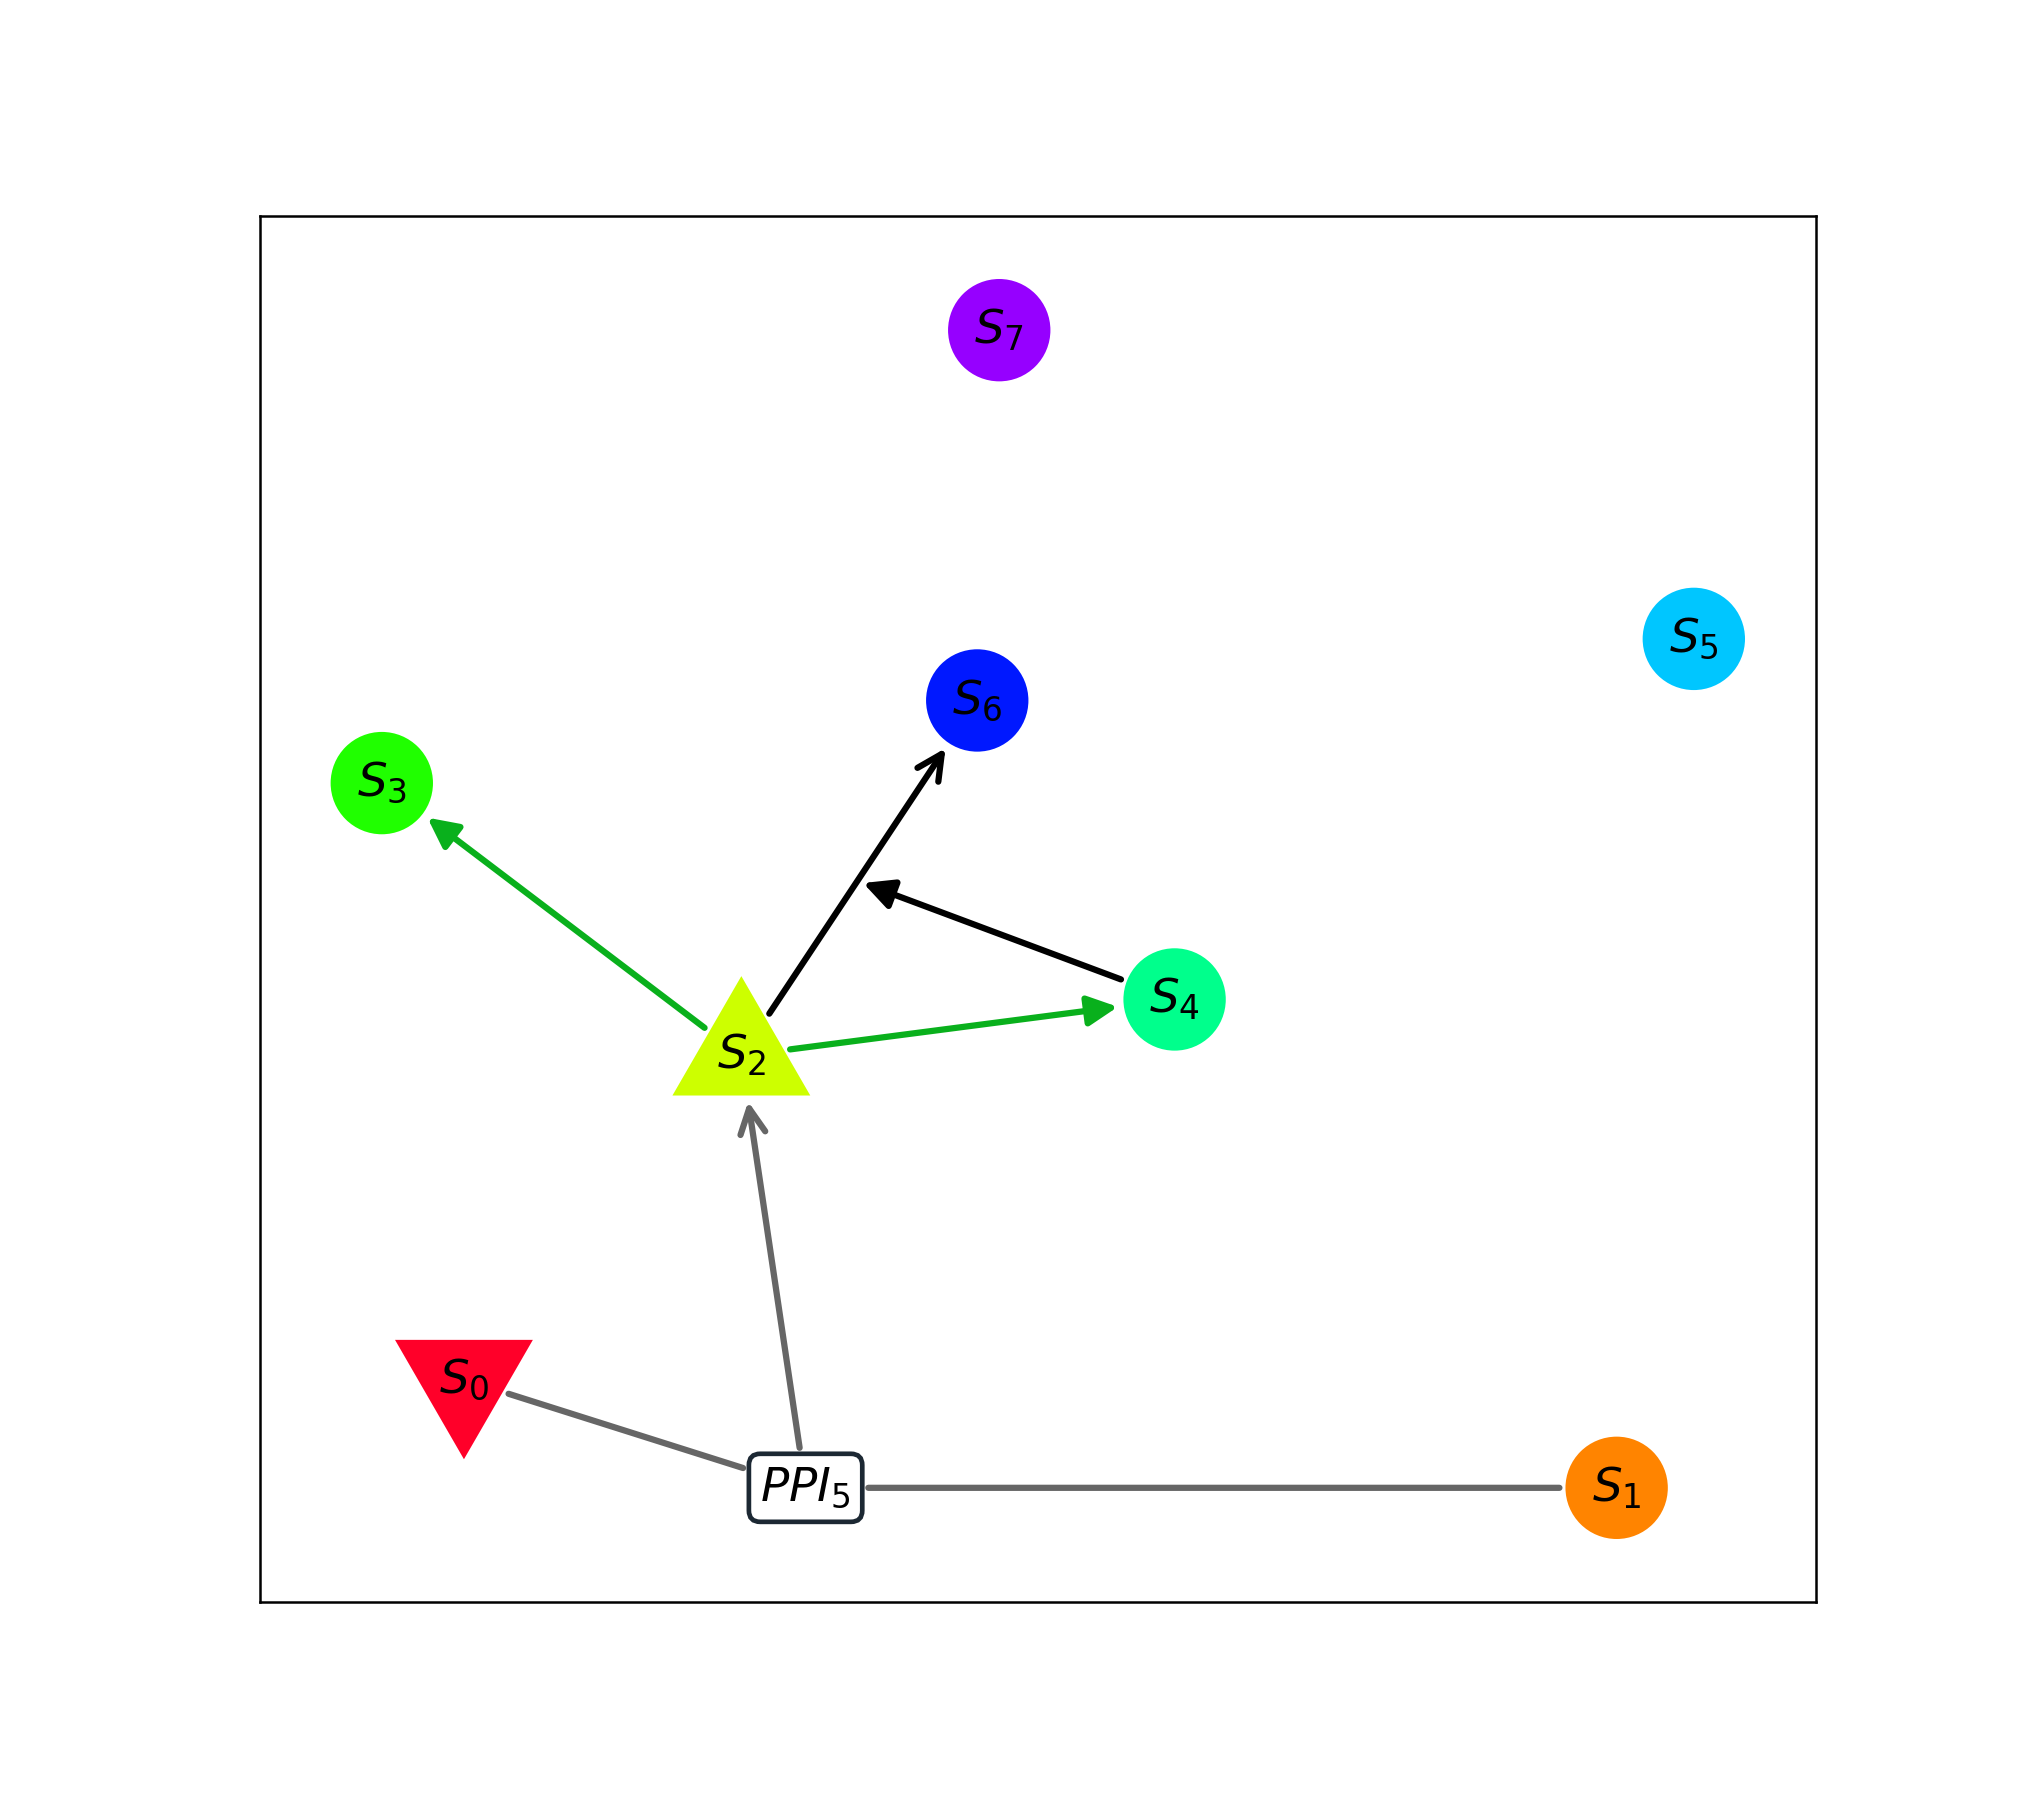

<IPython.core.display.Javascript object>


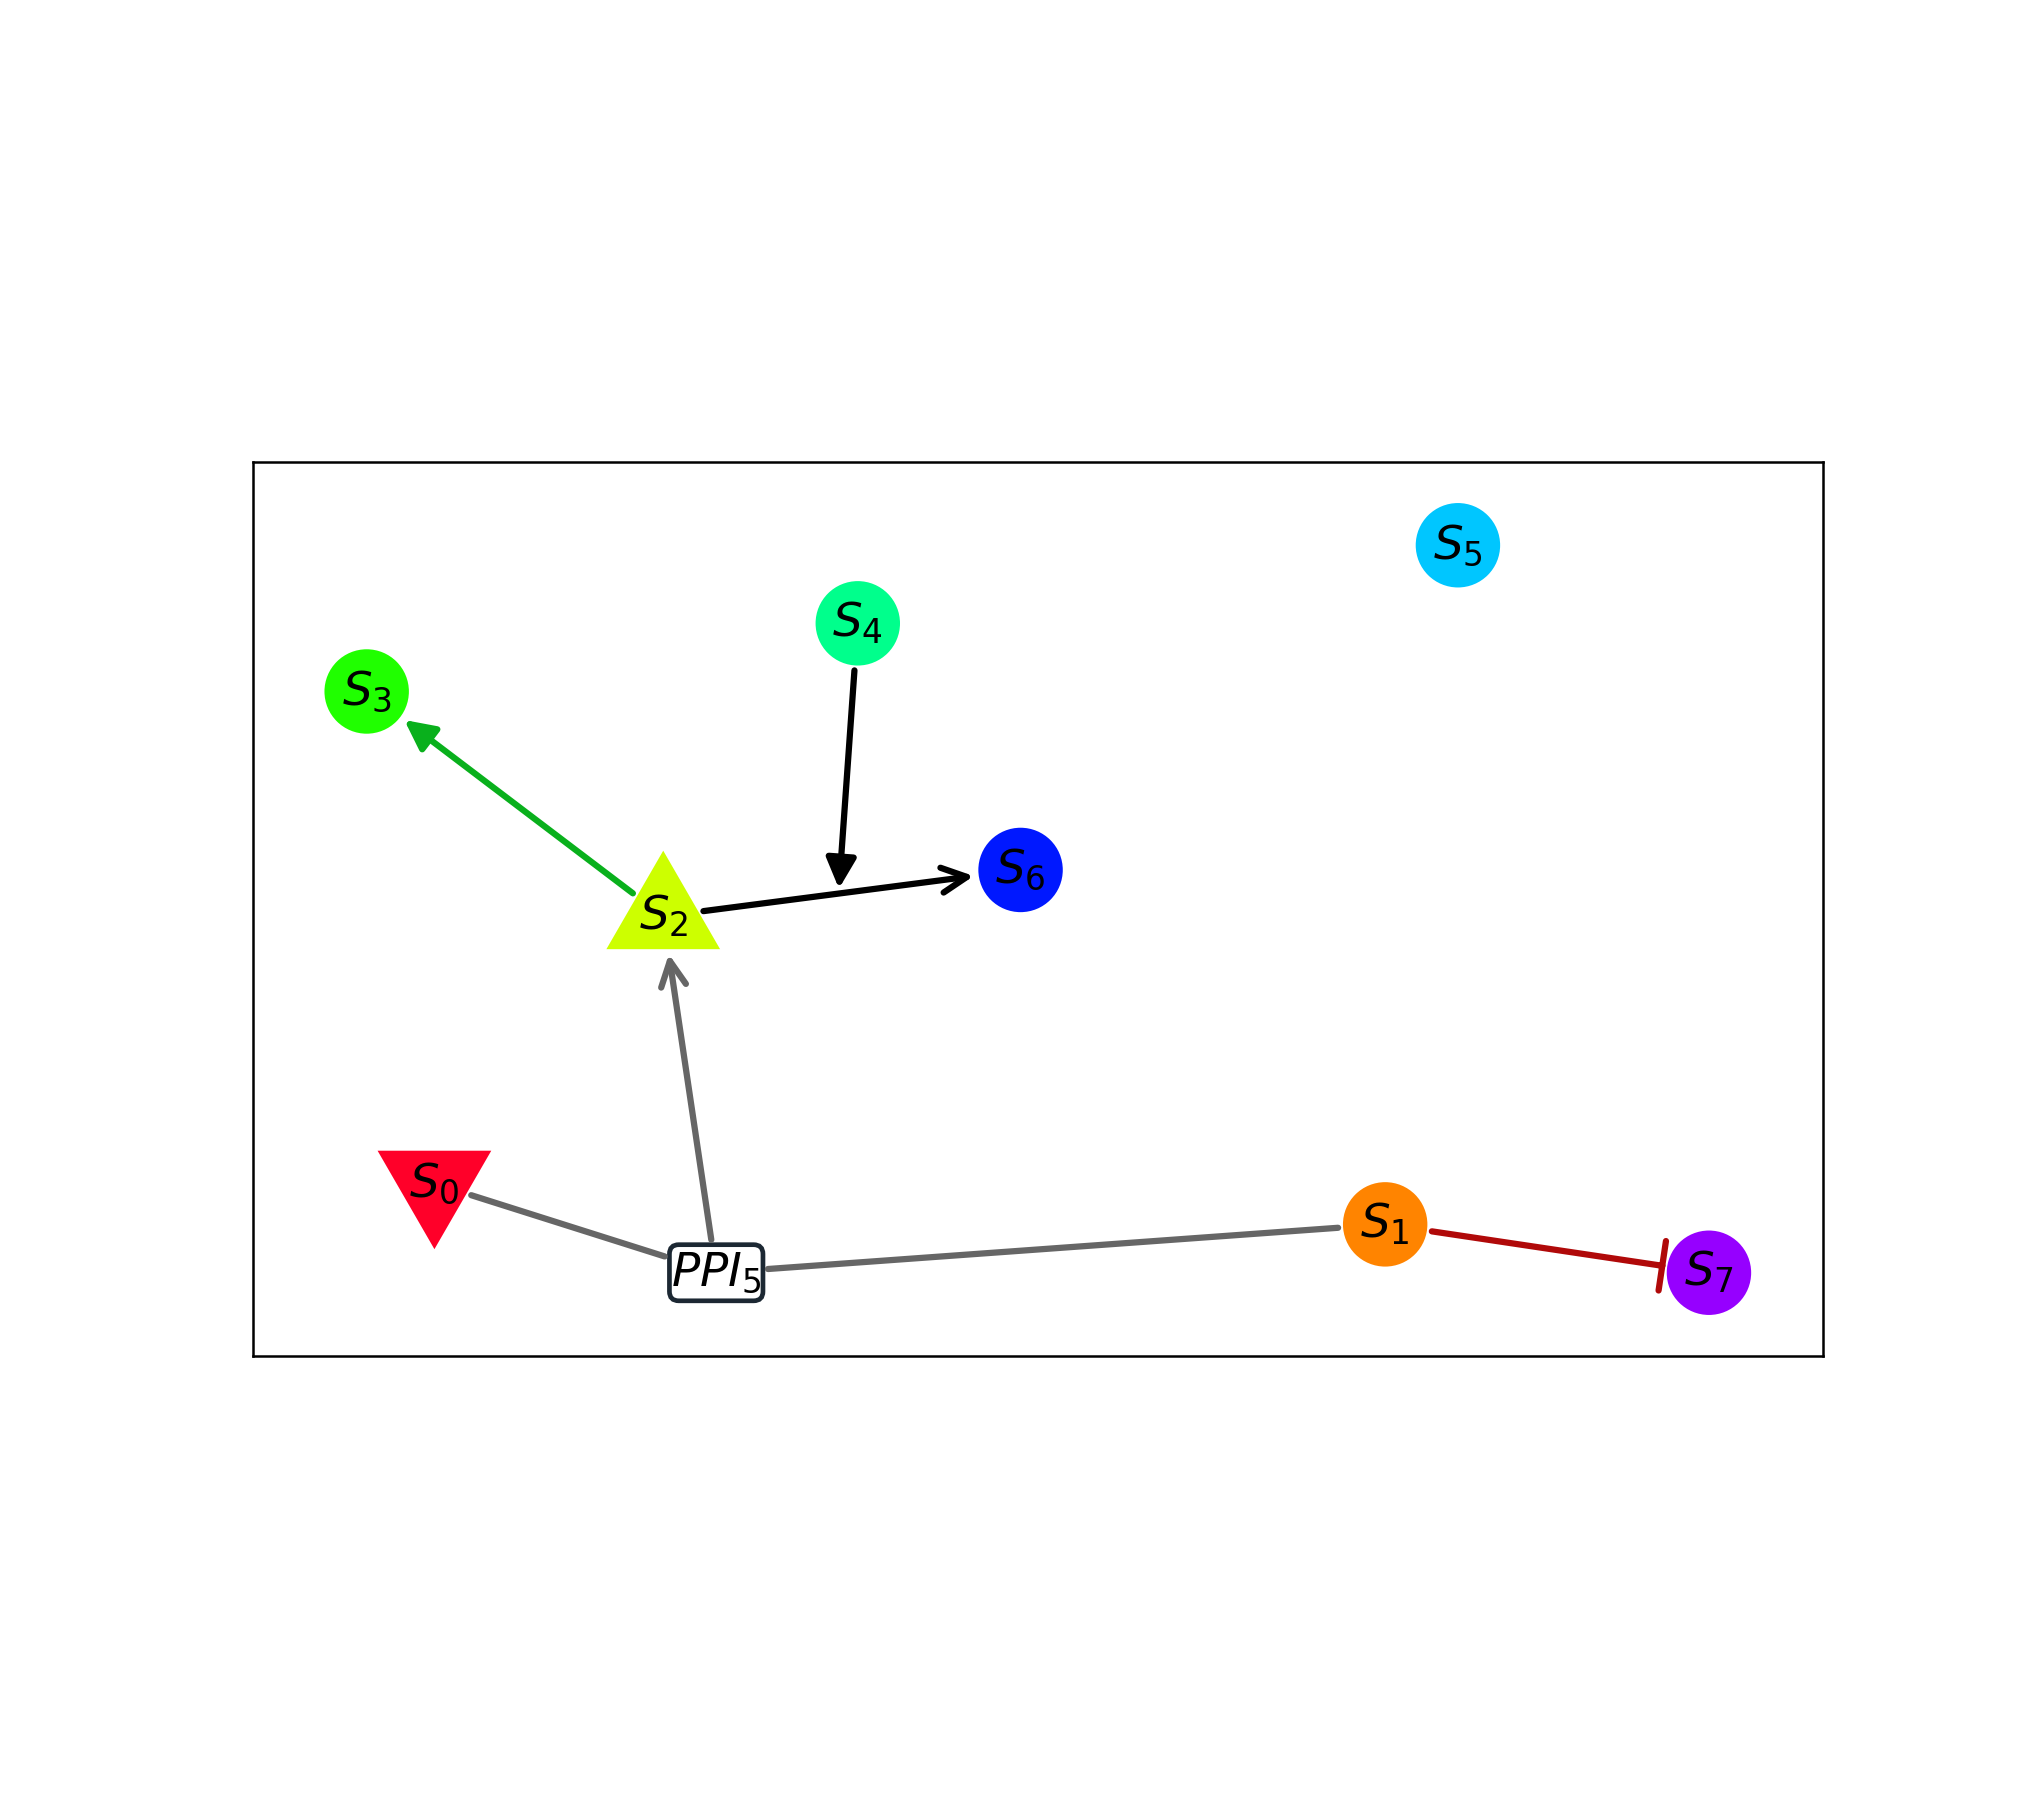

<IPython.core.display.Javascript object>


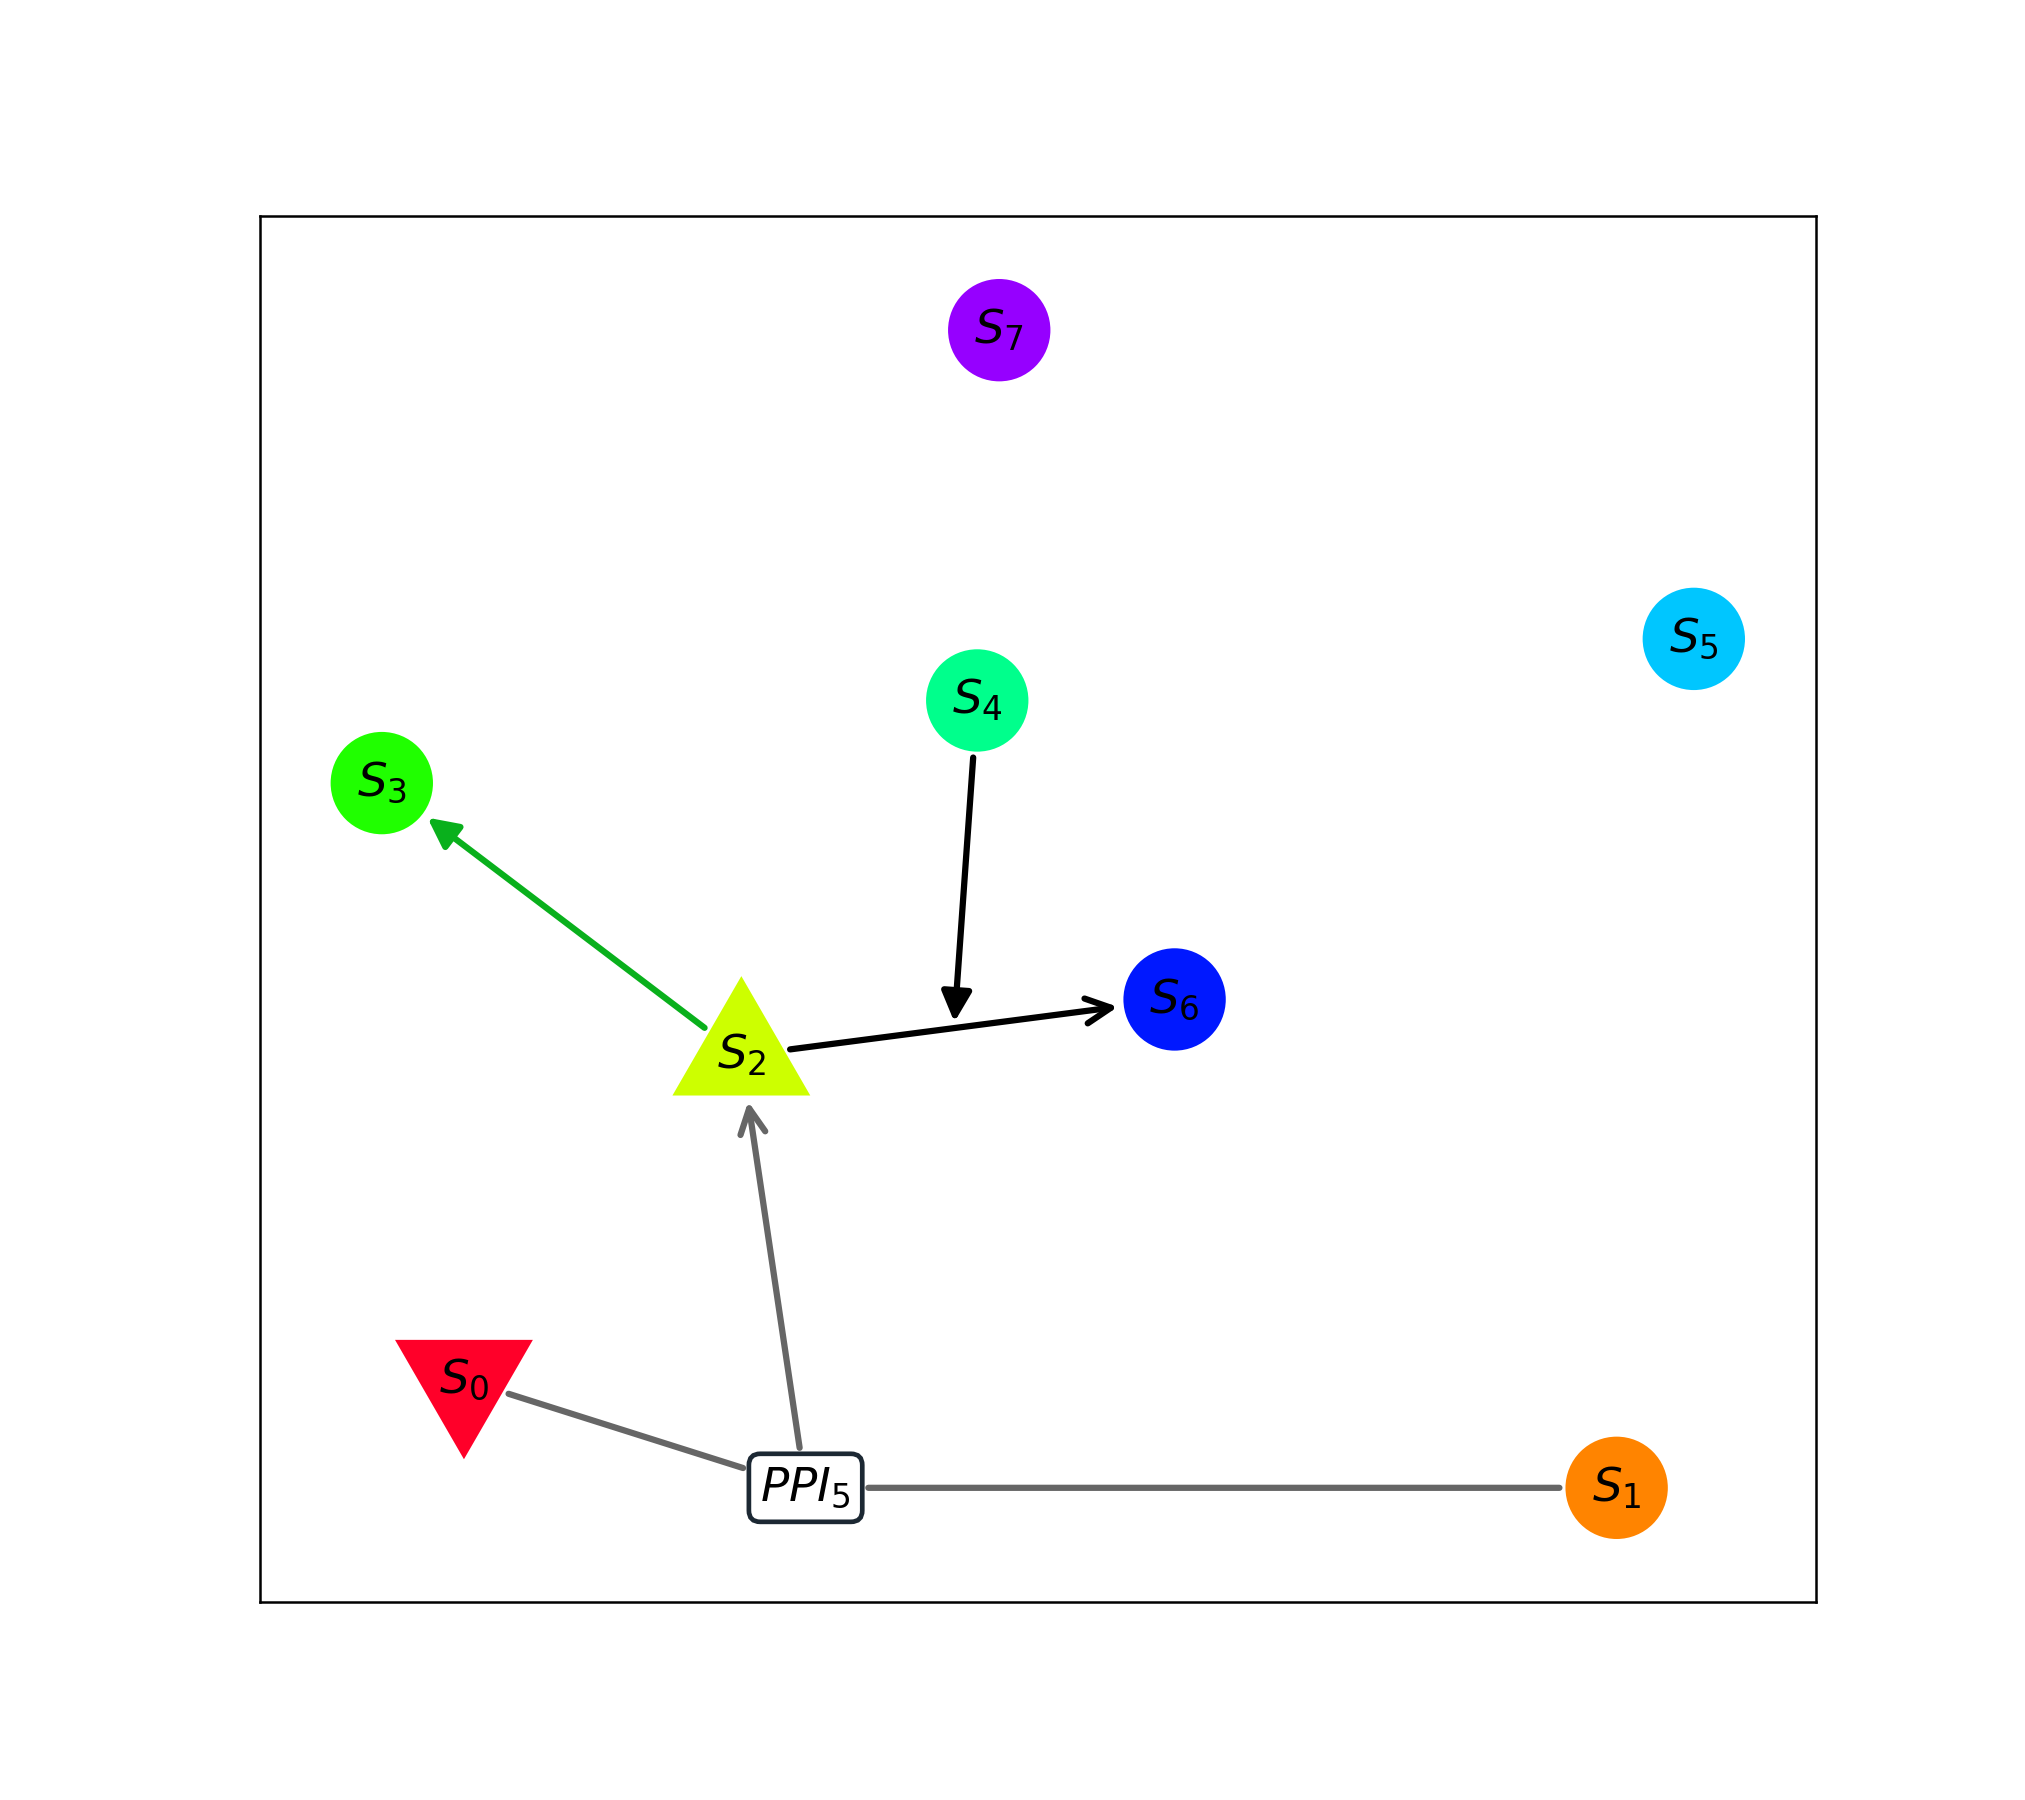

<IPython.core.display.Javascript object>


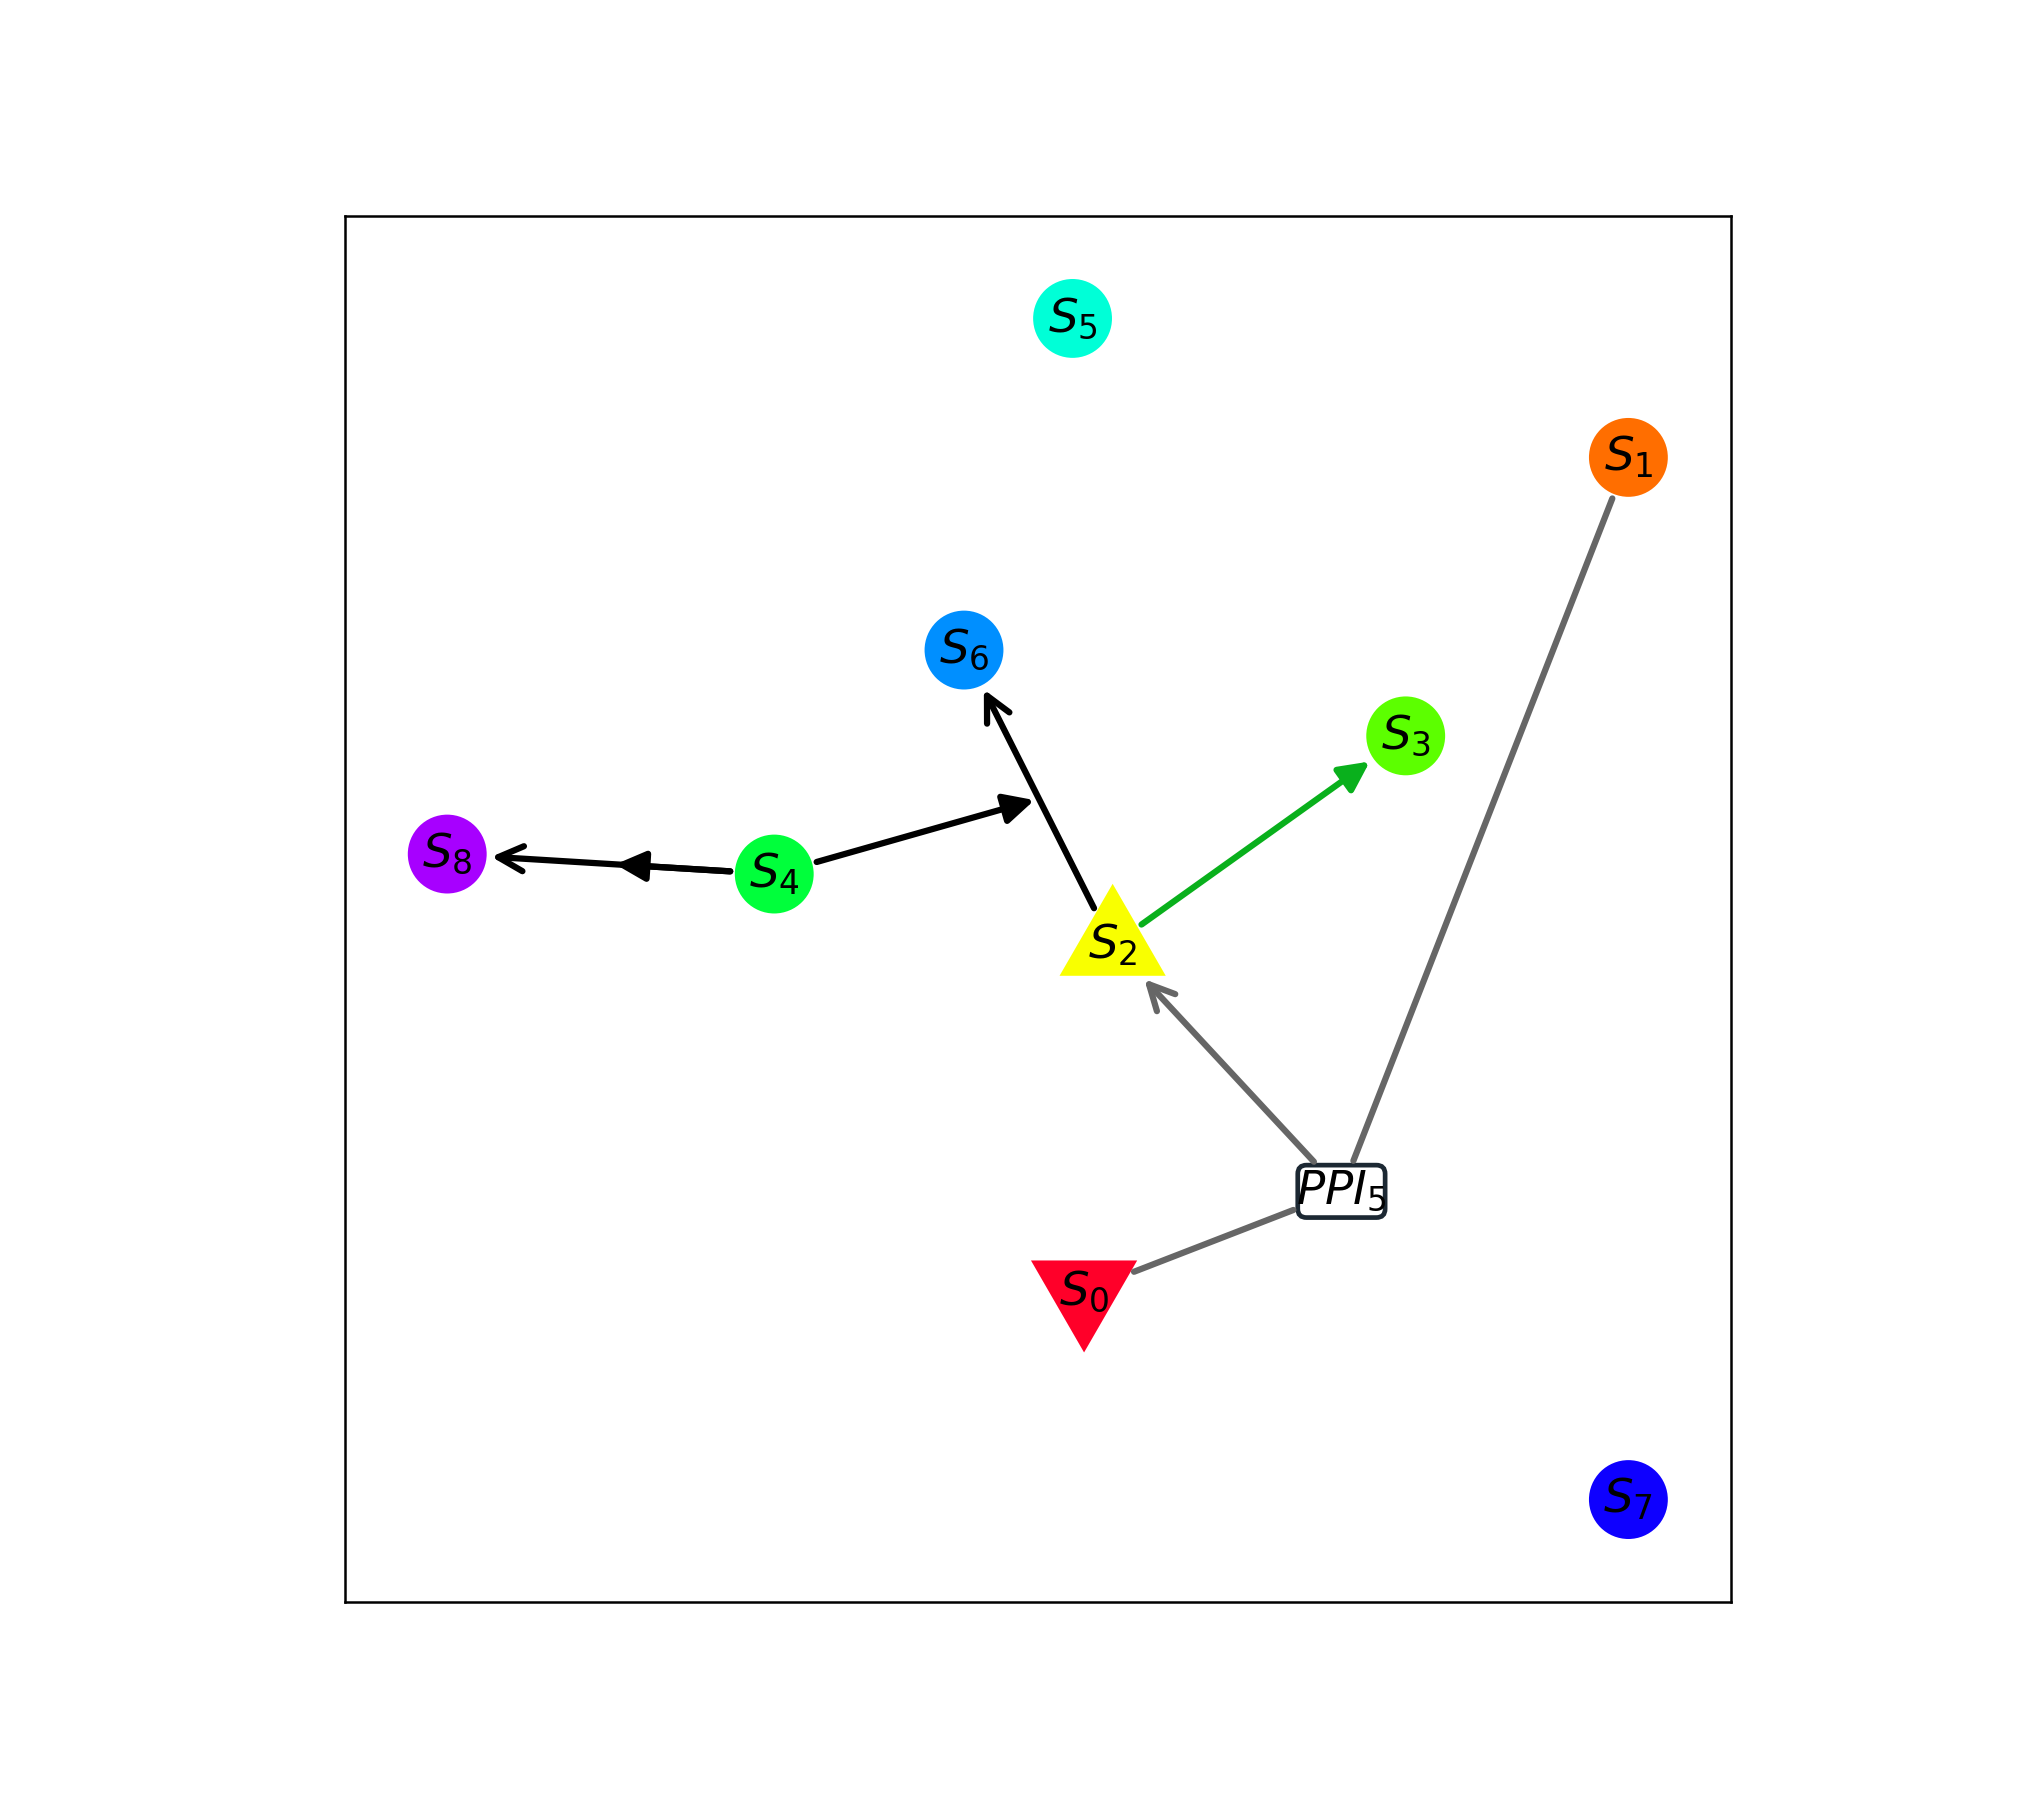

<IPython.core.display.Javascript object>


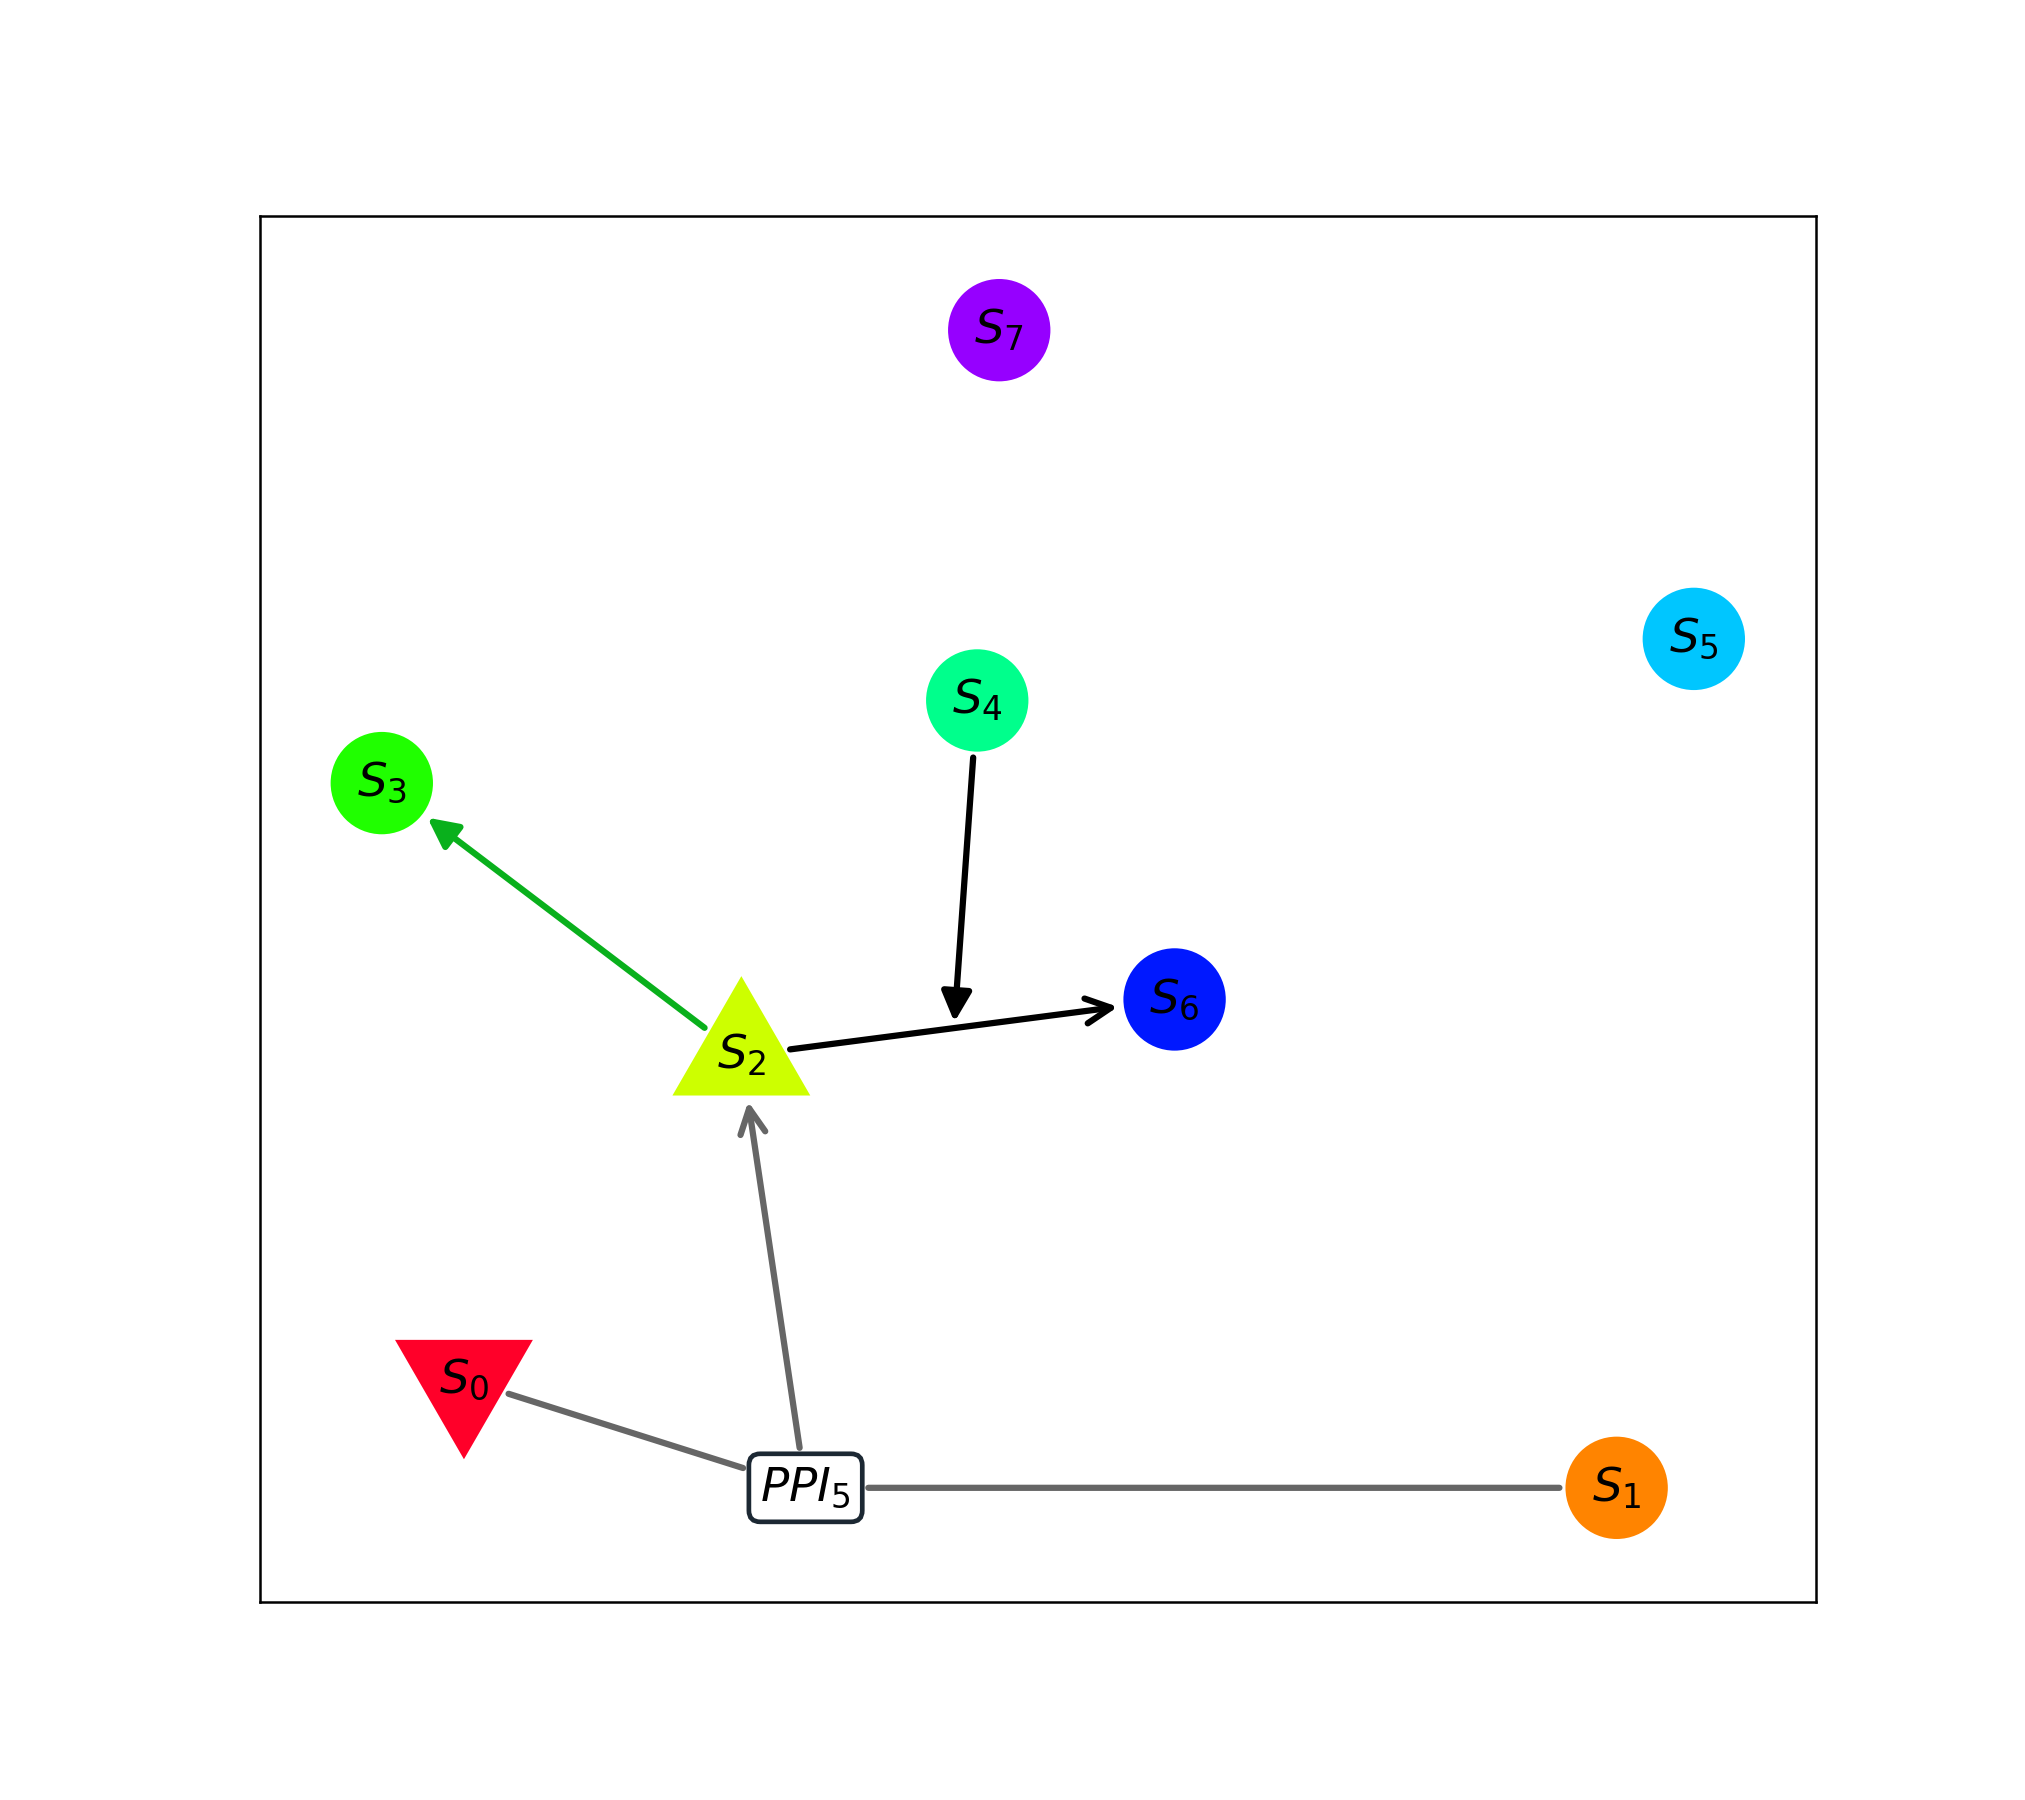

<IPython.core.display.Javascript object>


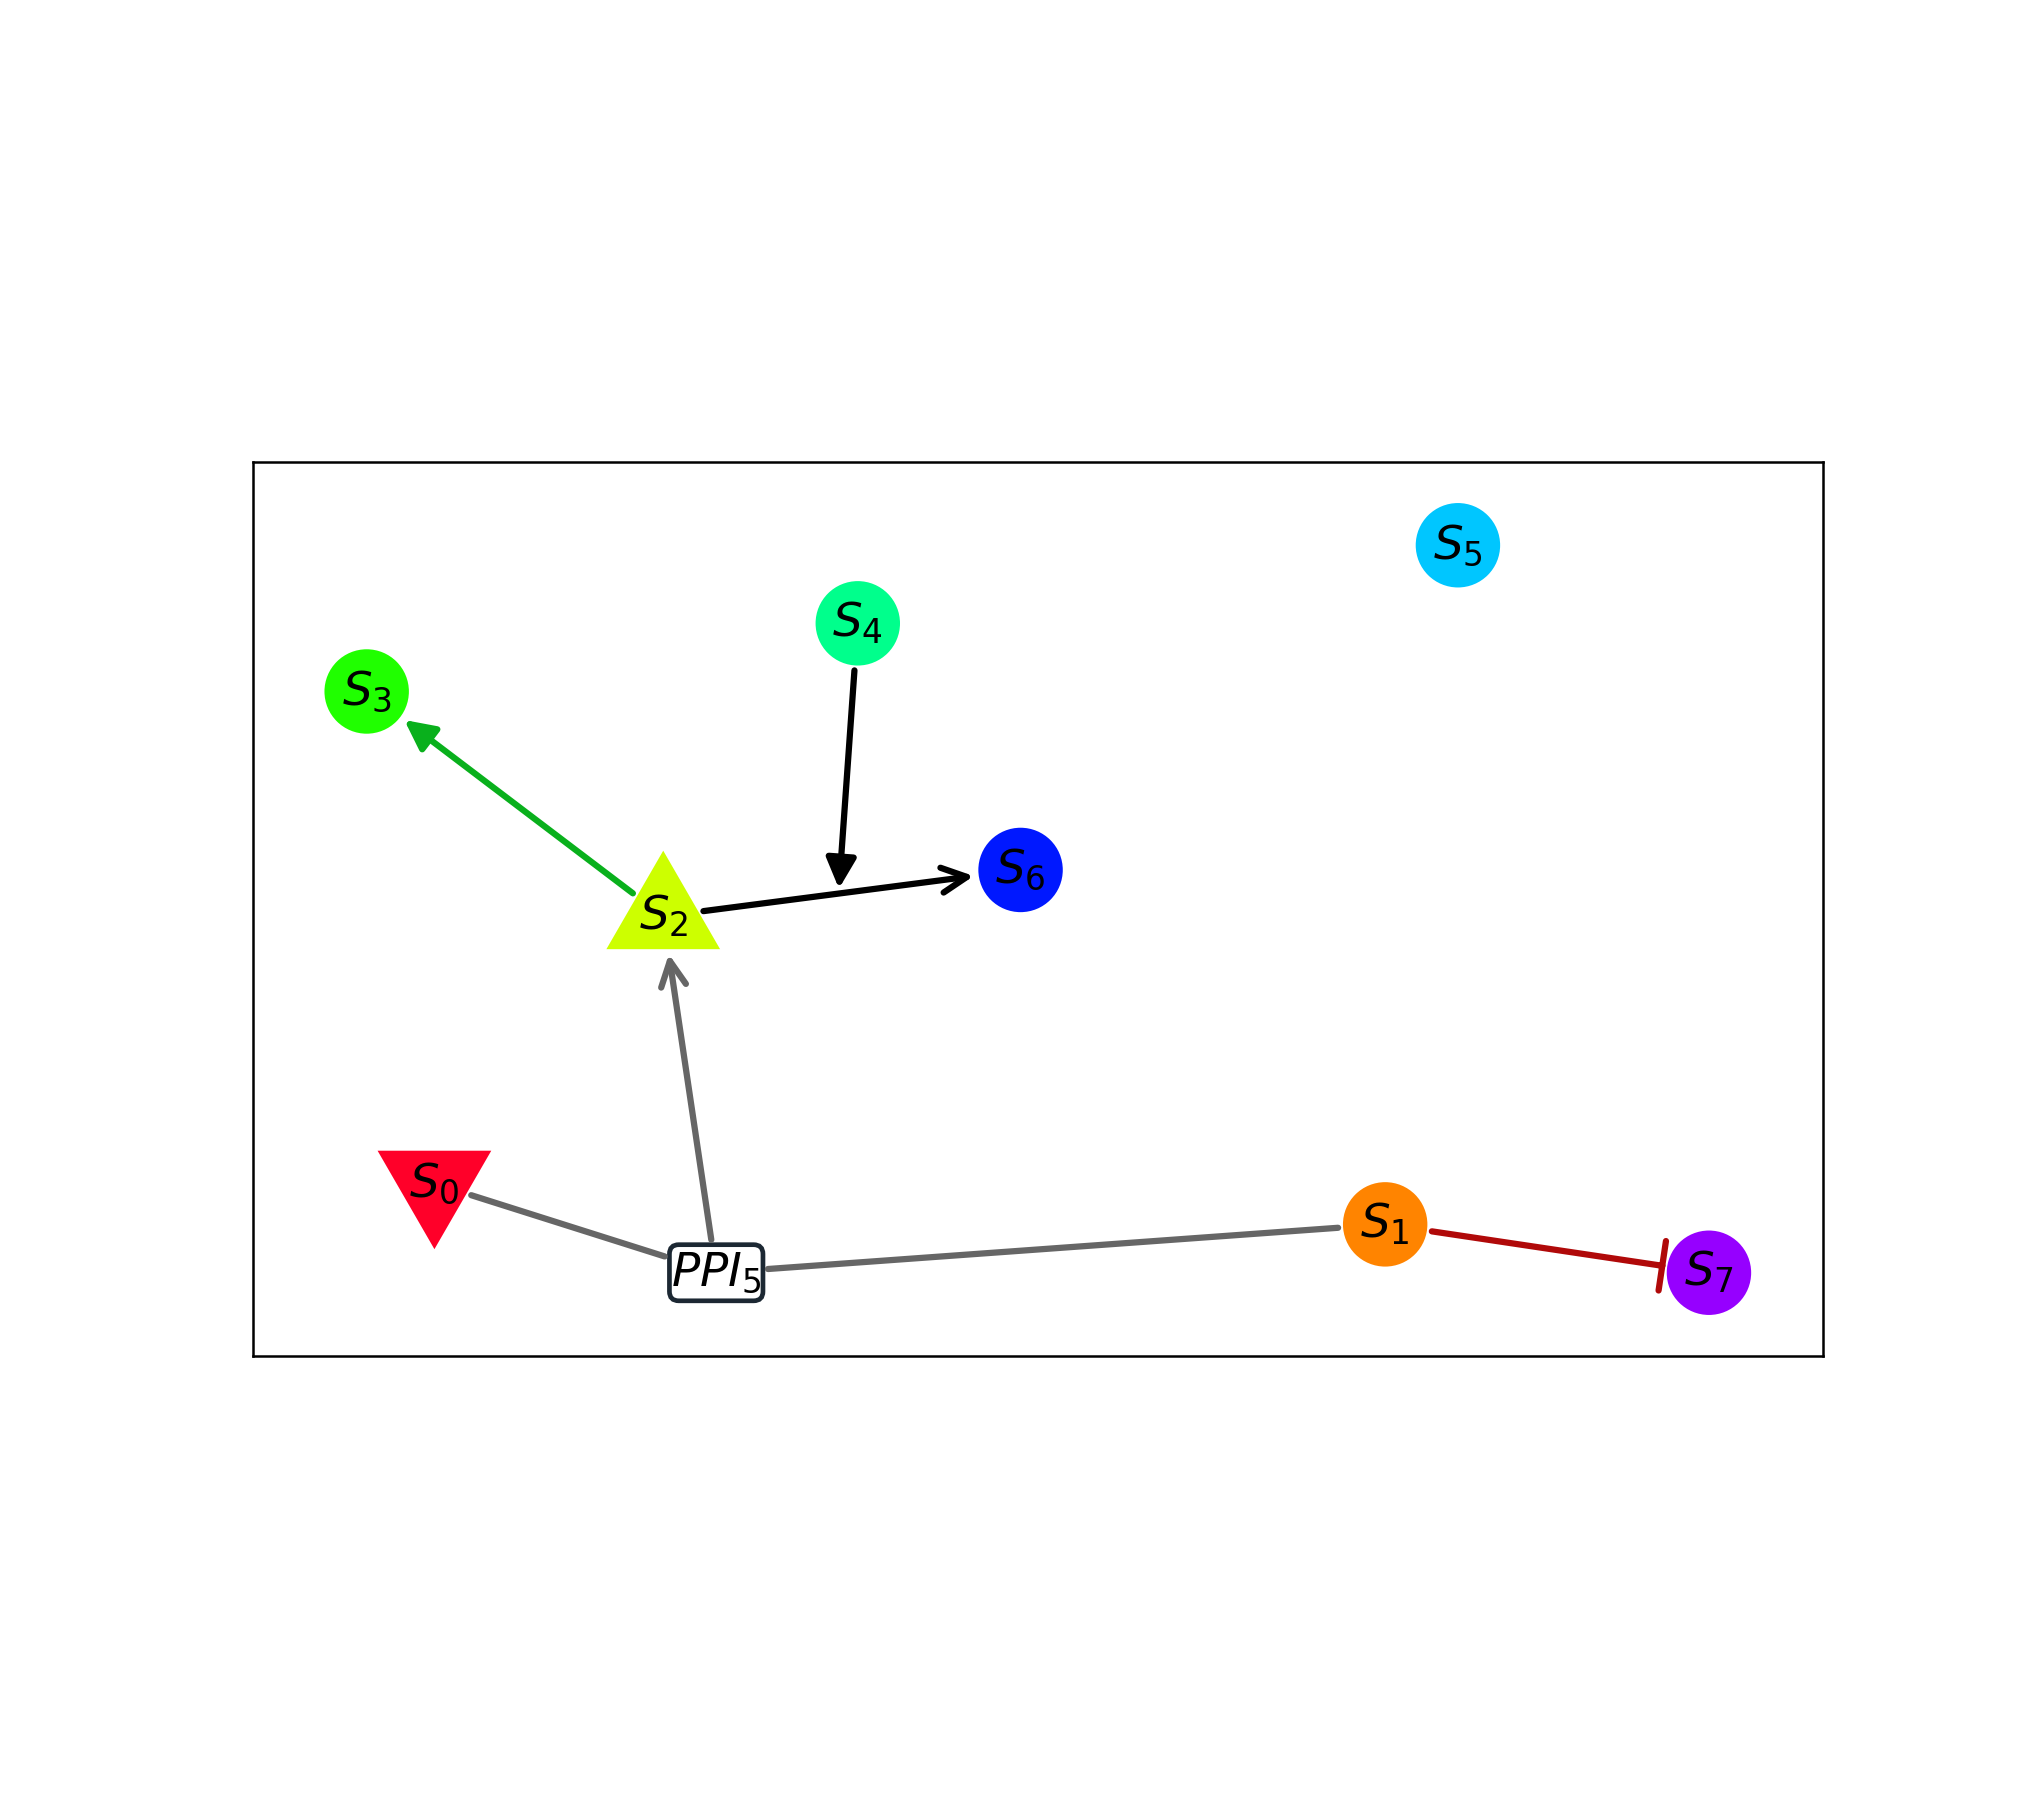

<IPython.core.display.Javascript object>


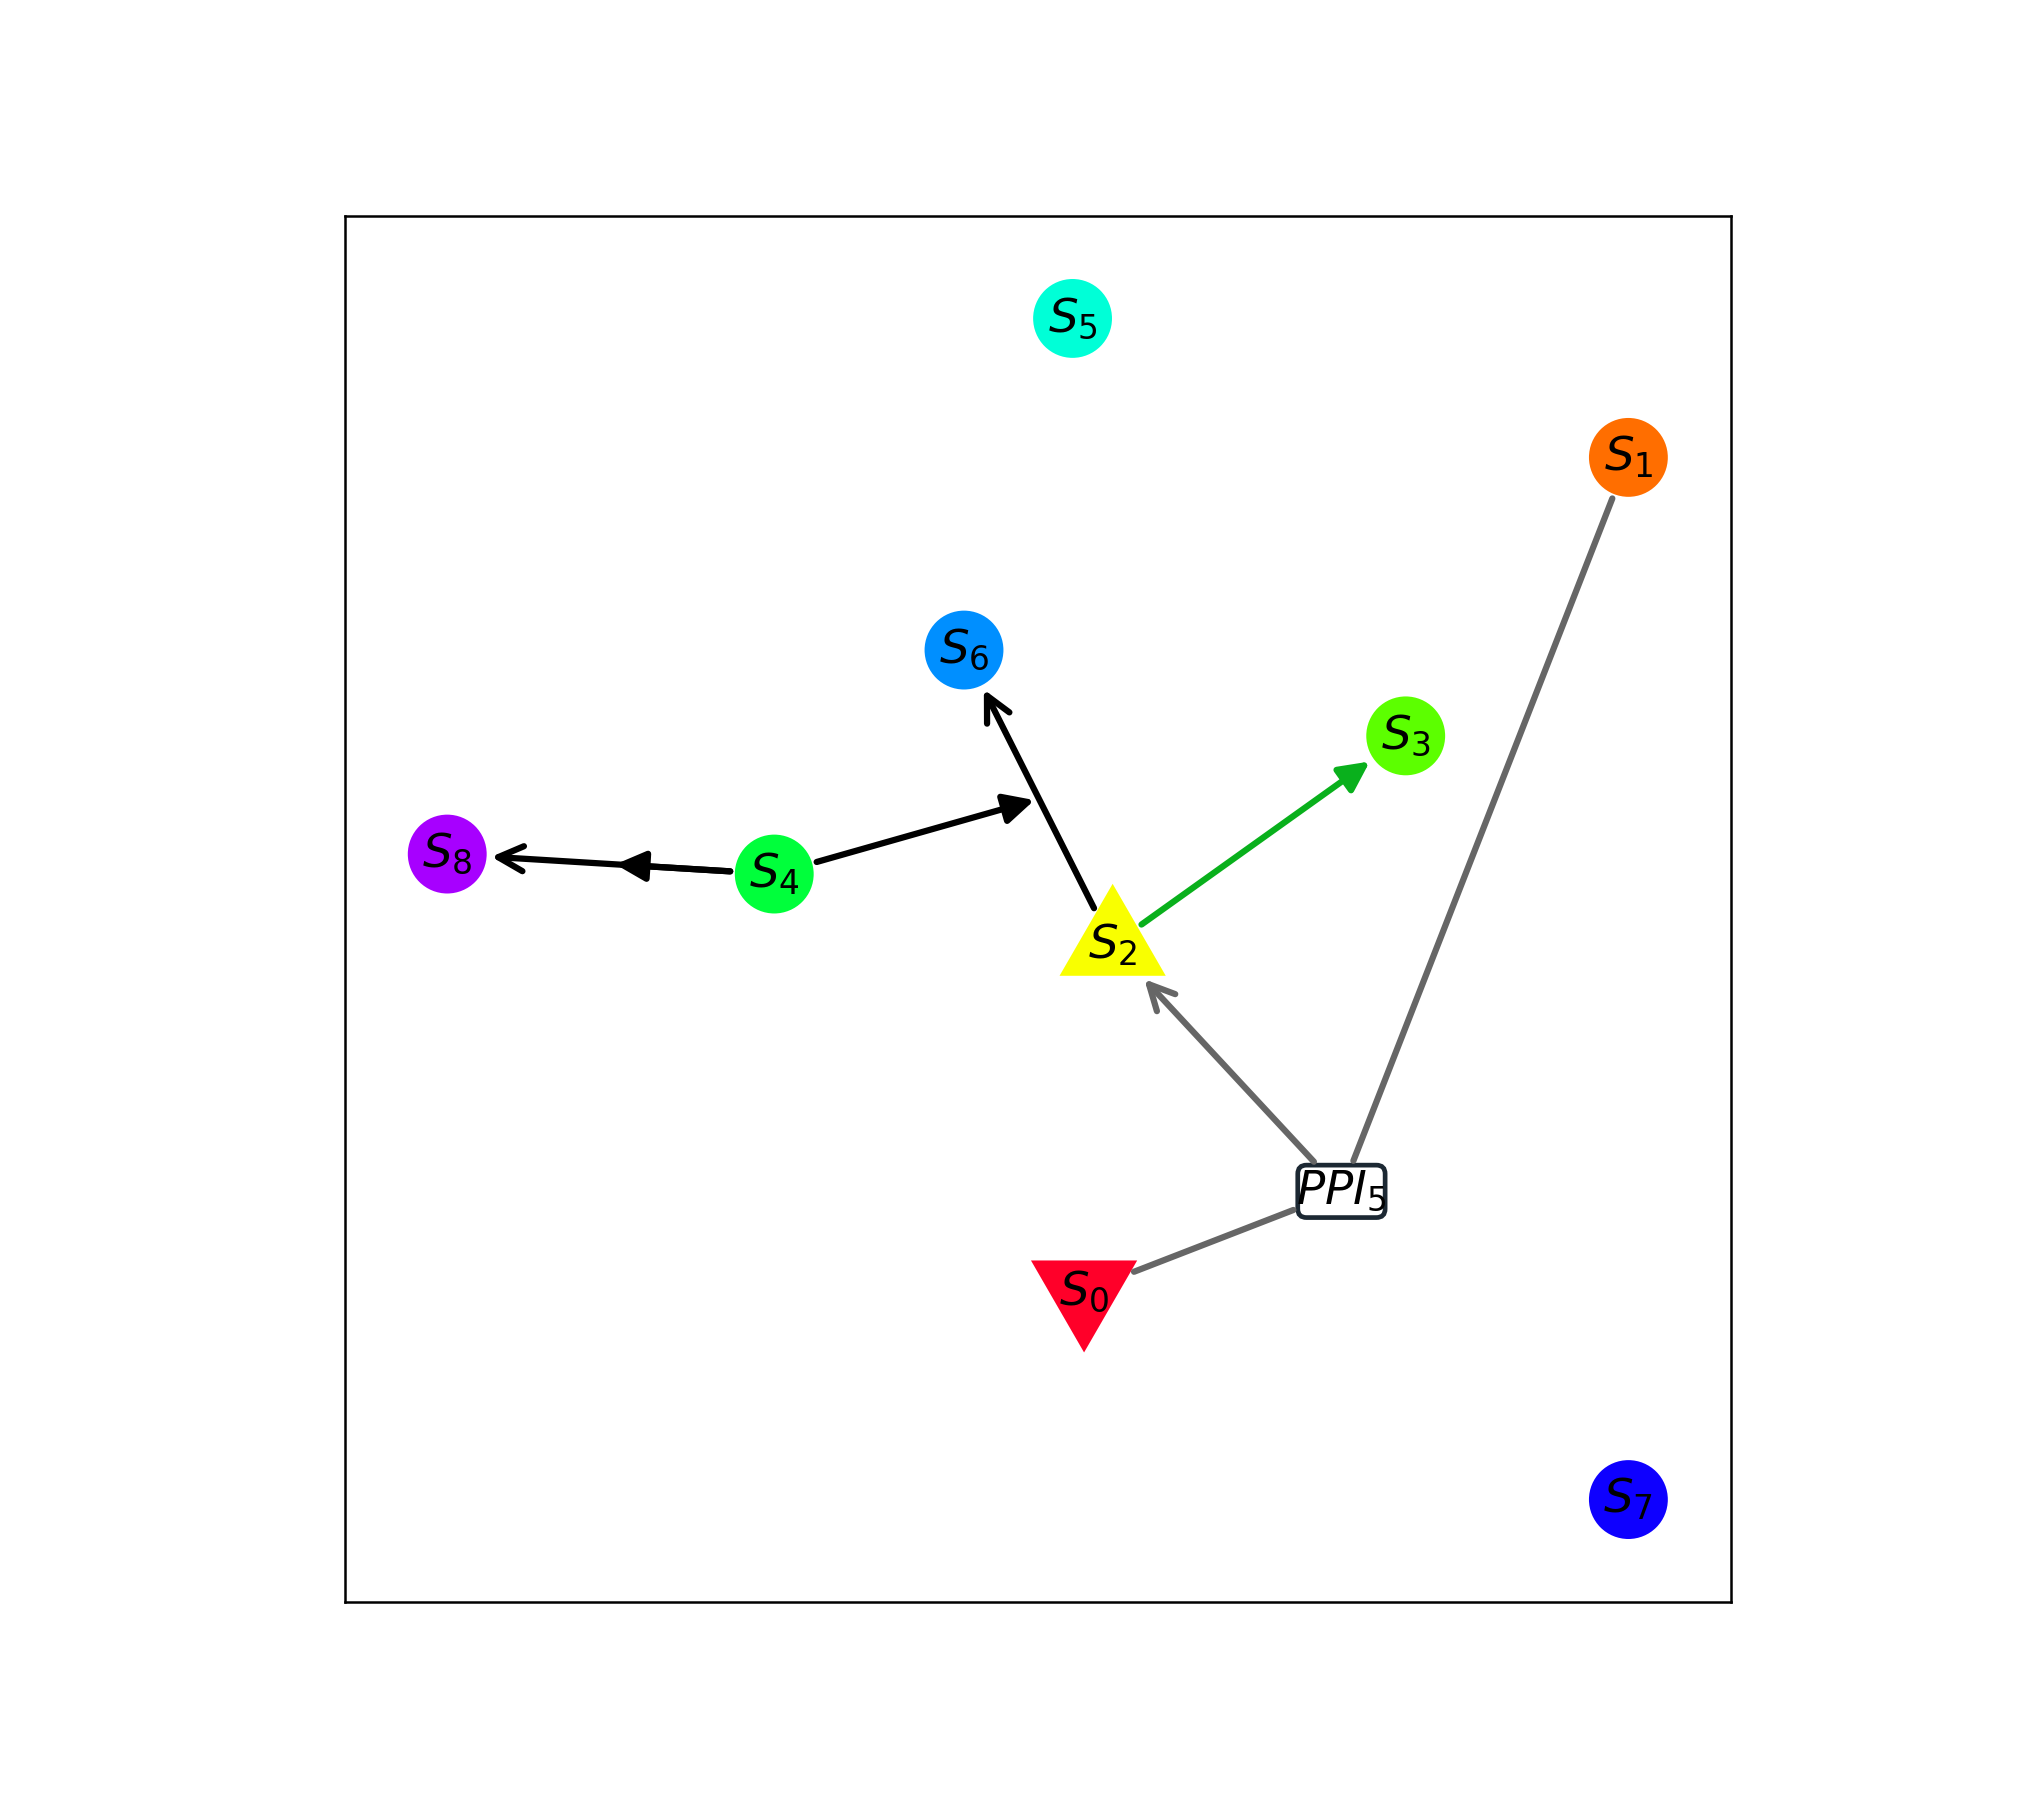

<IPython.core.display.Javascript object>


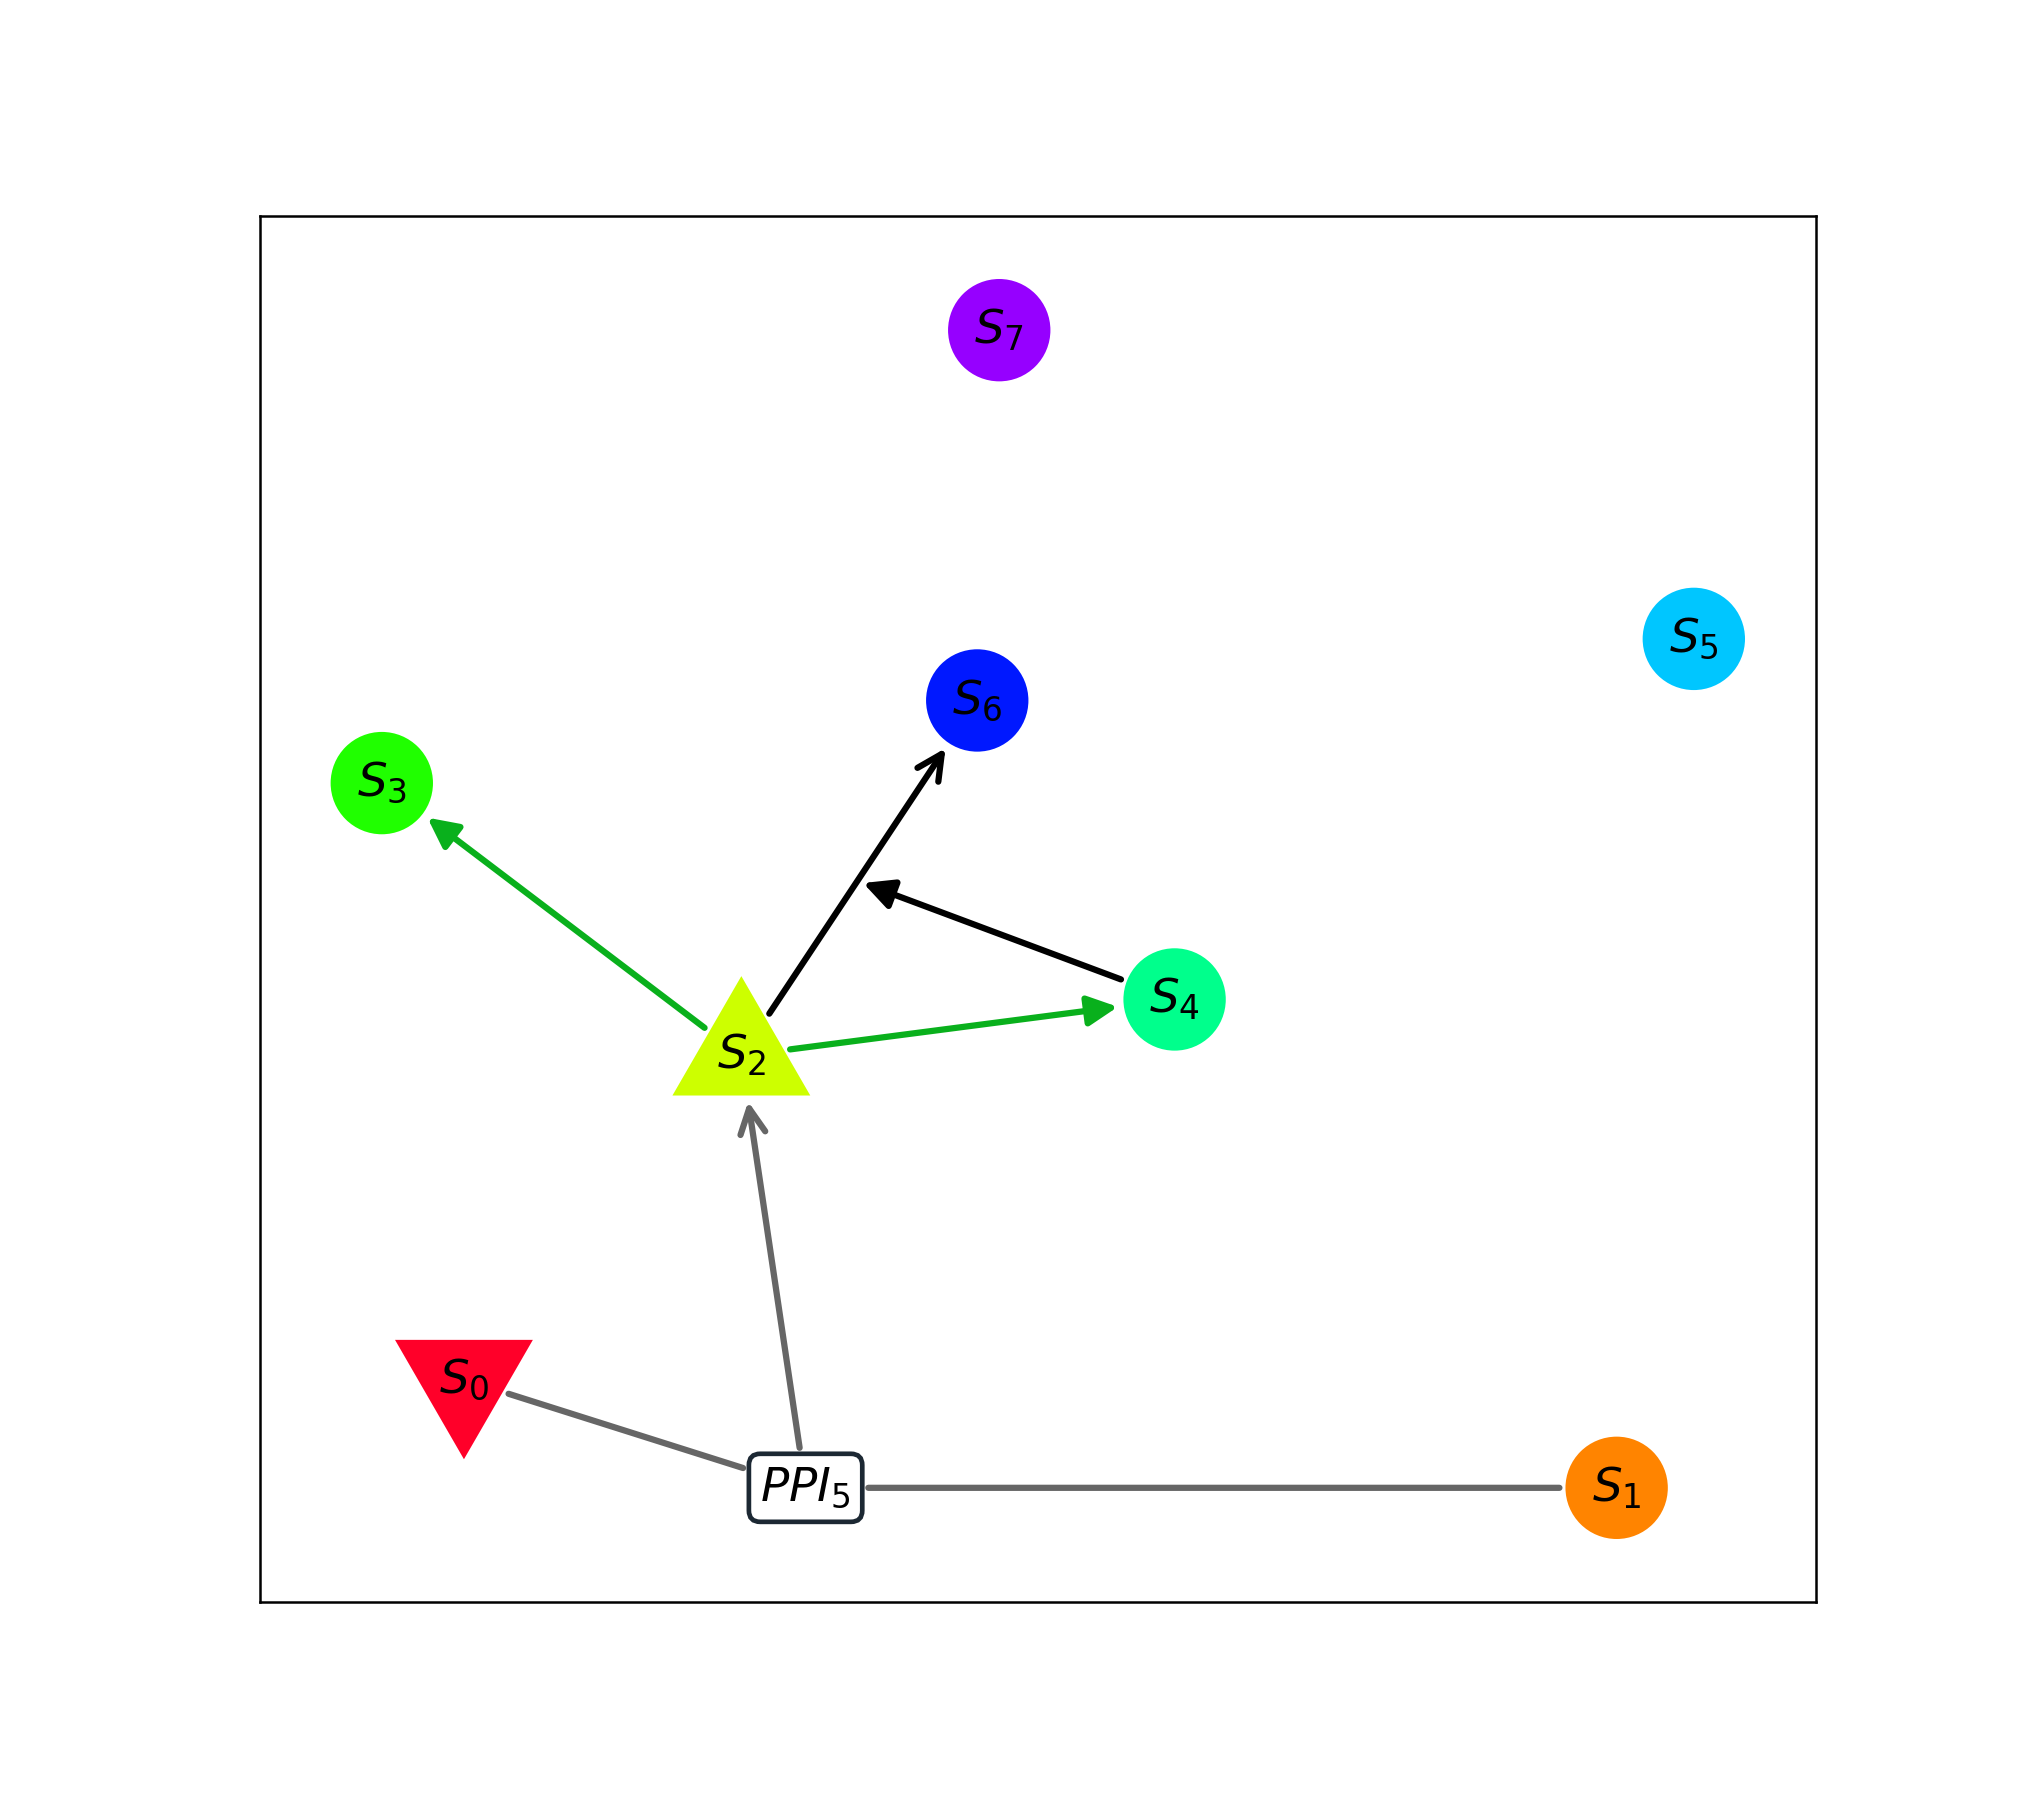

<IPython.core.display.Javascript object>


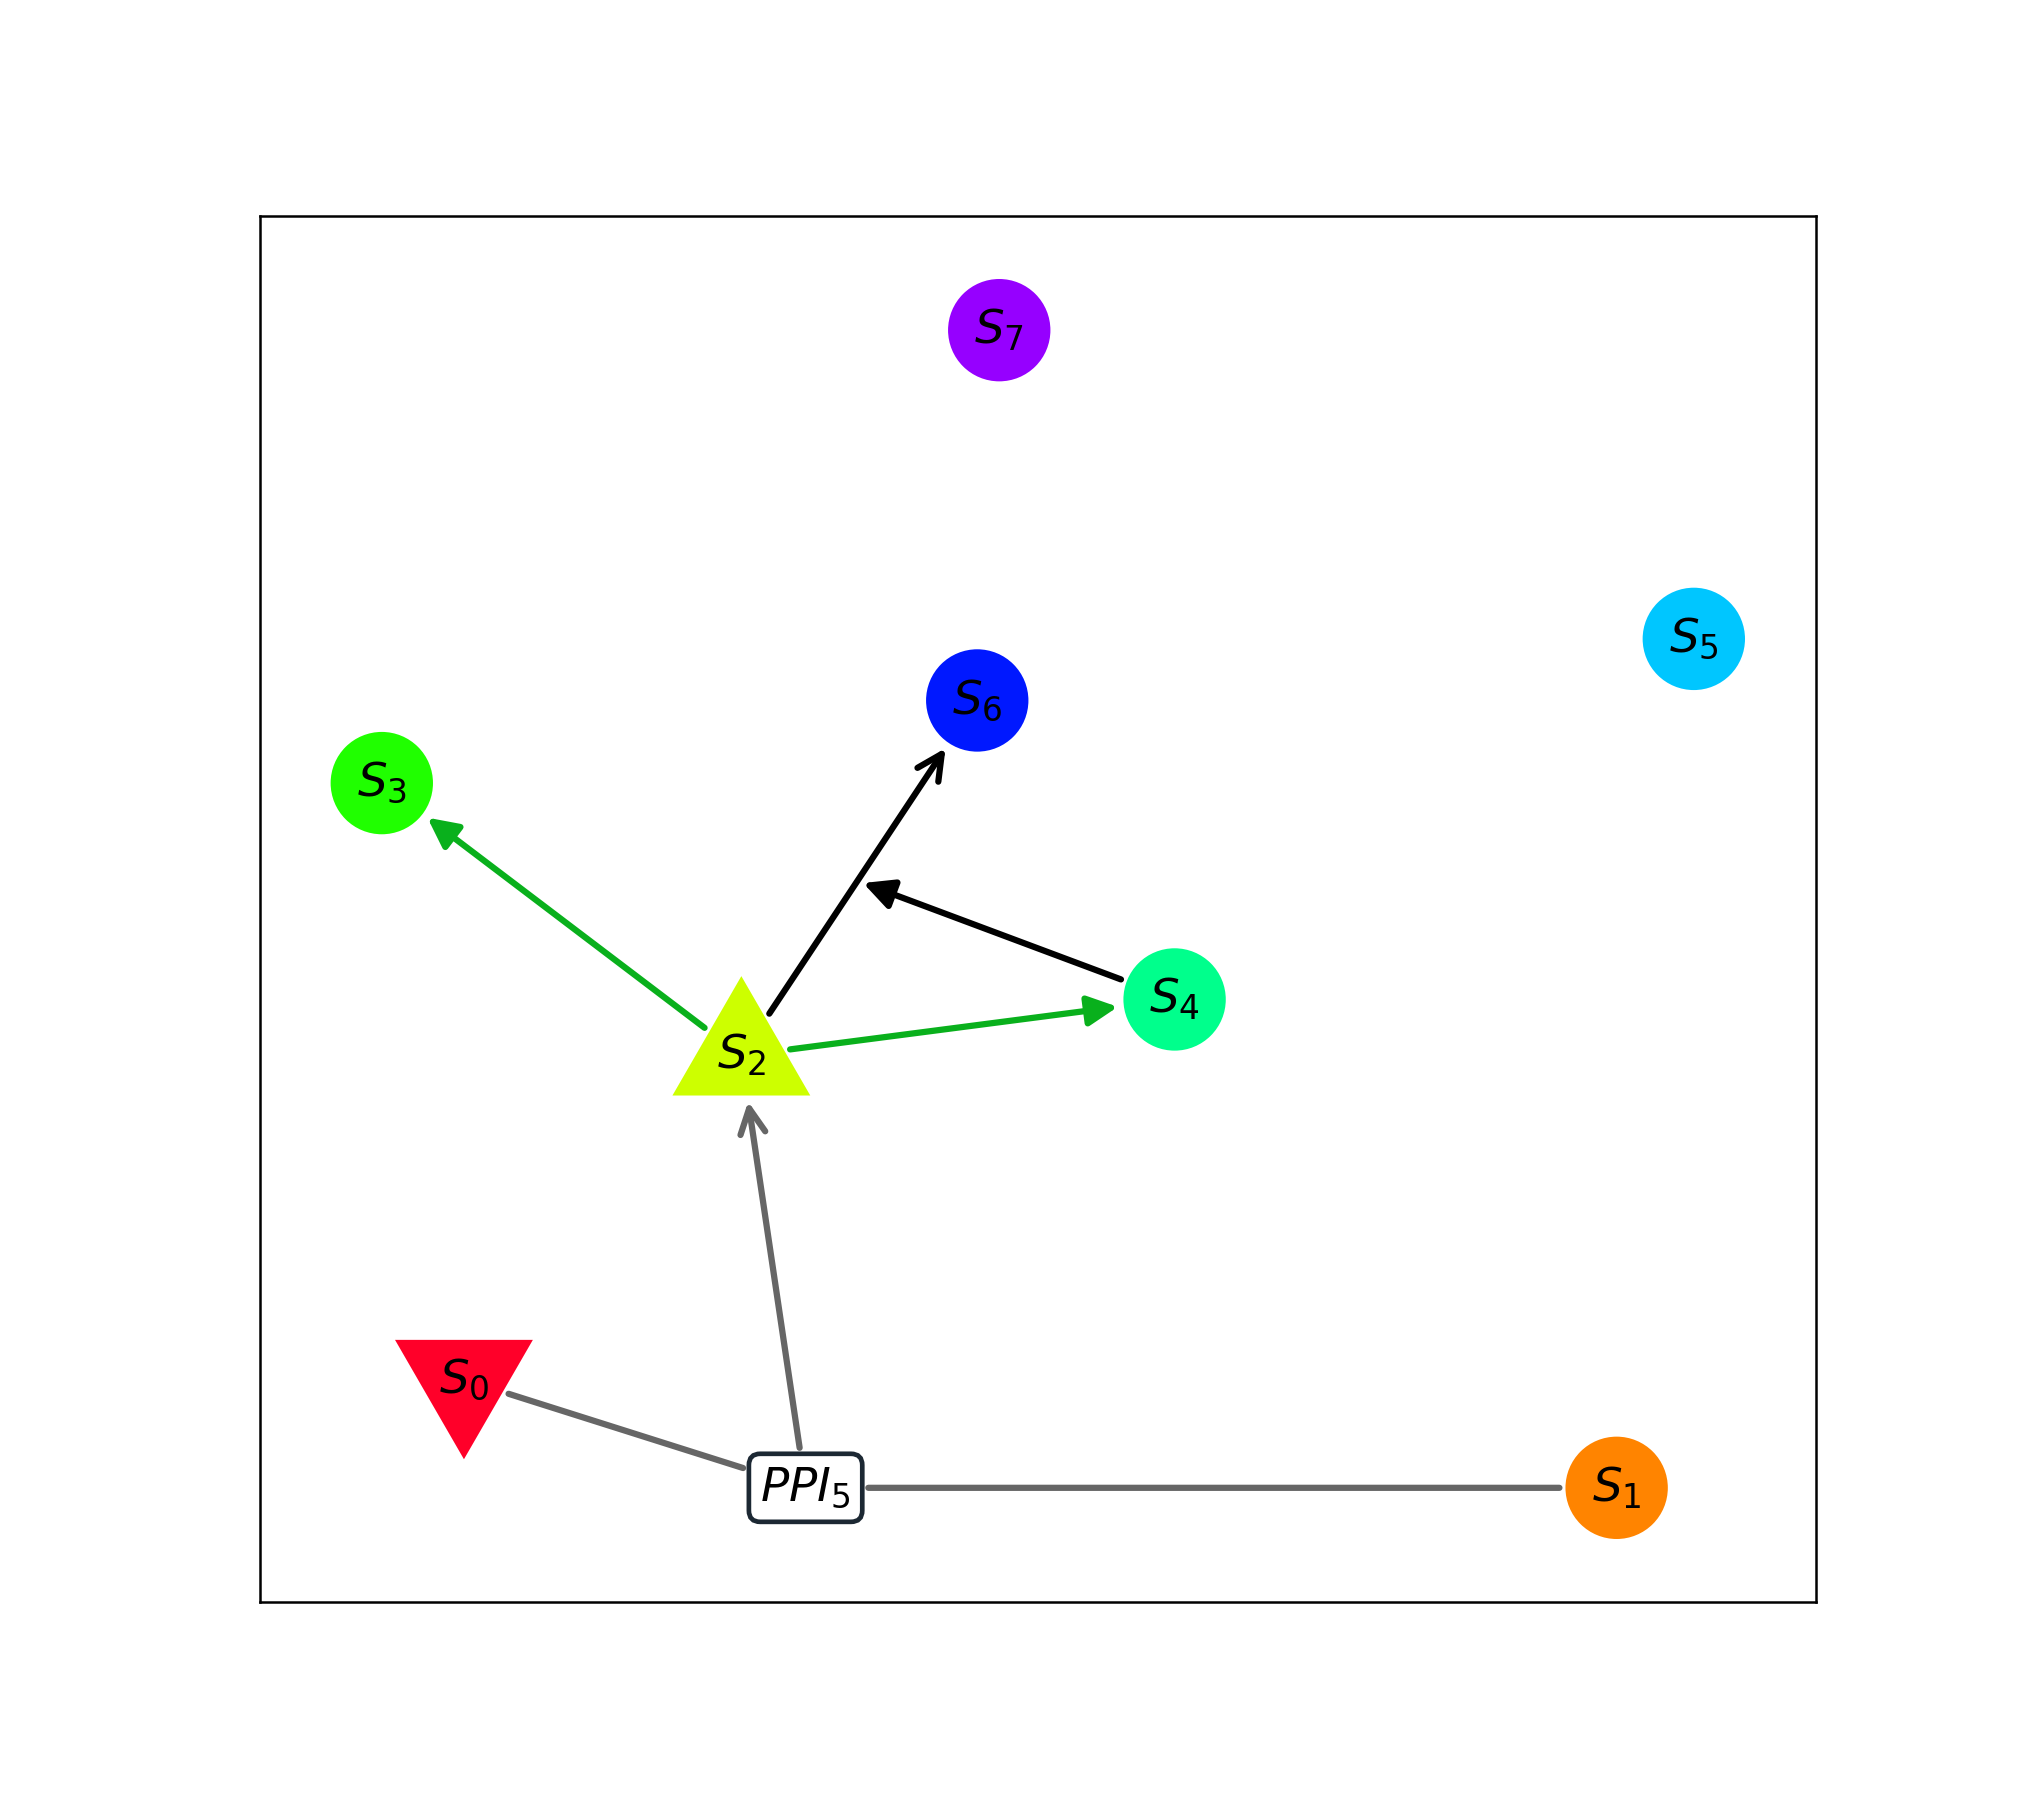

<IPython.core.display.Javascript object>


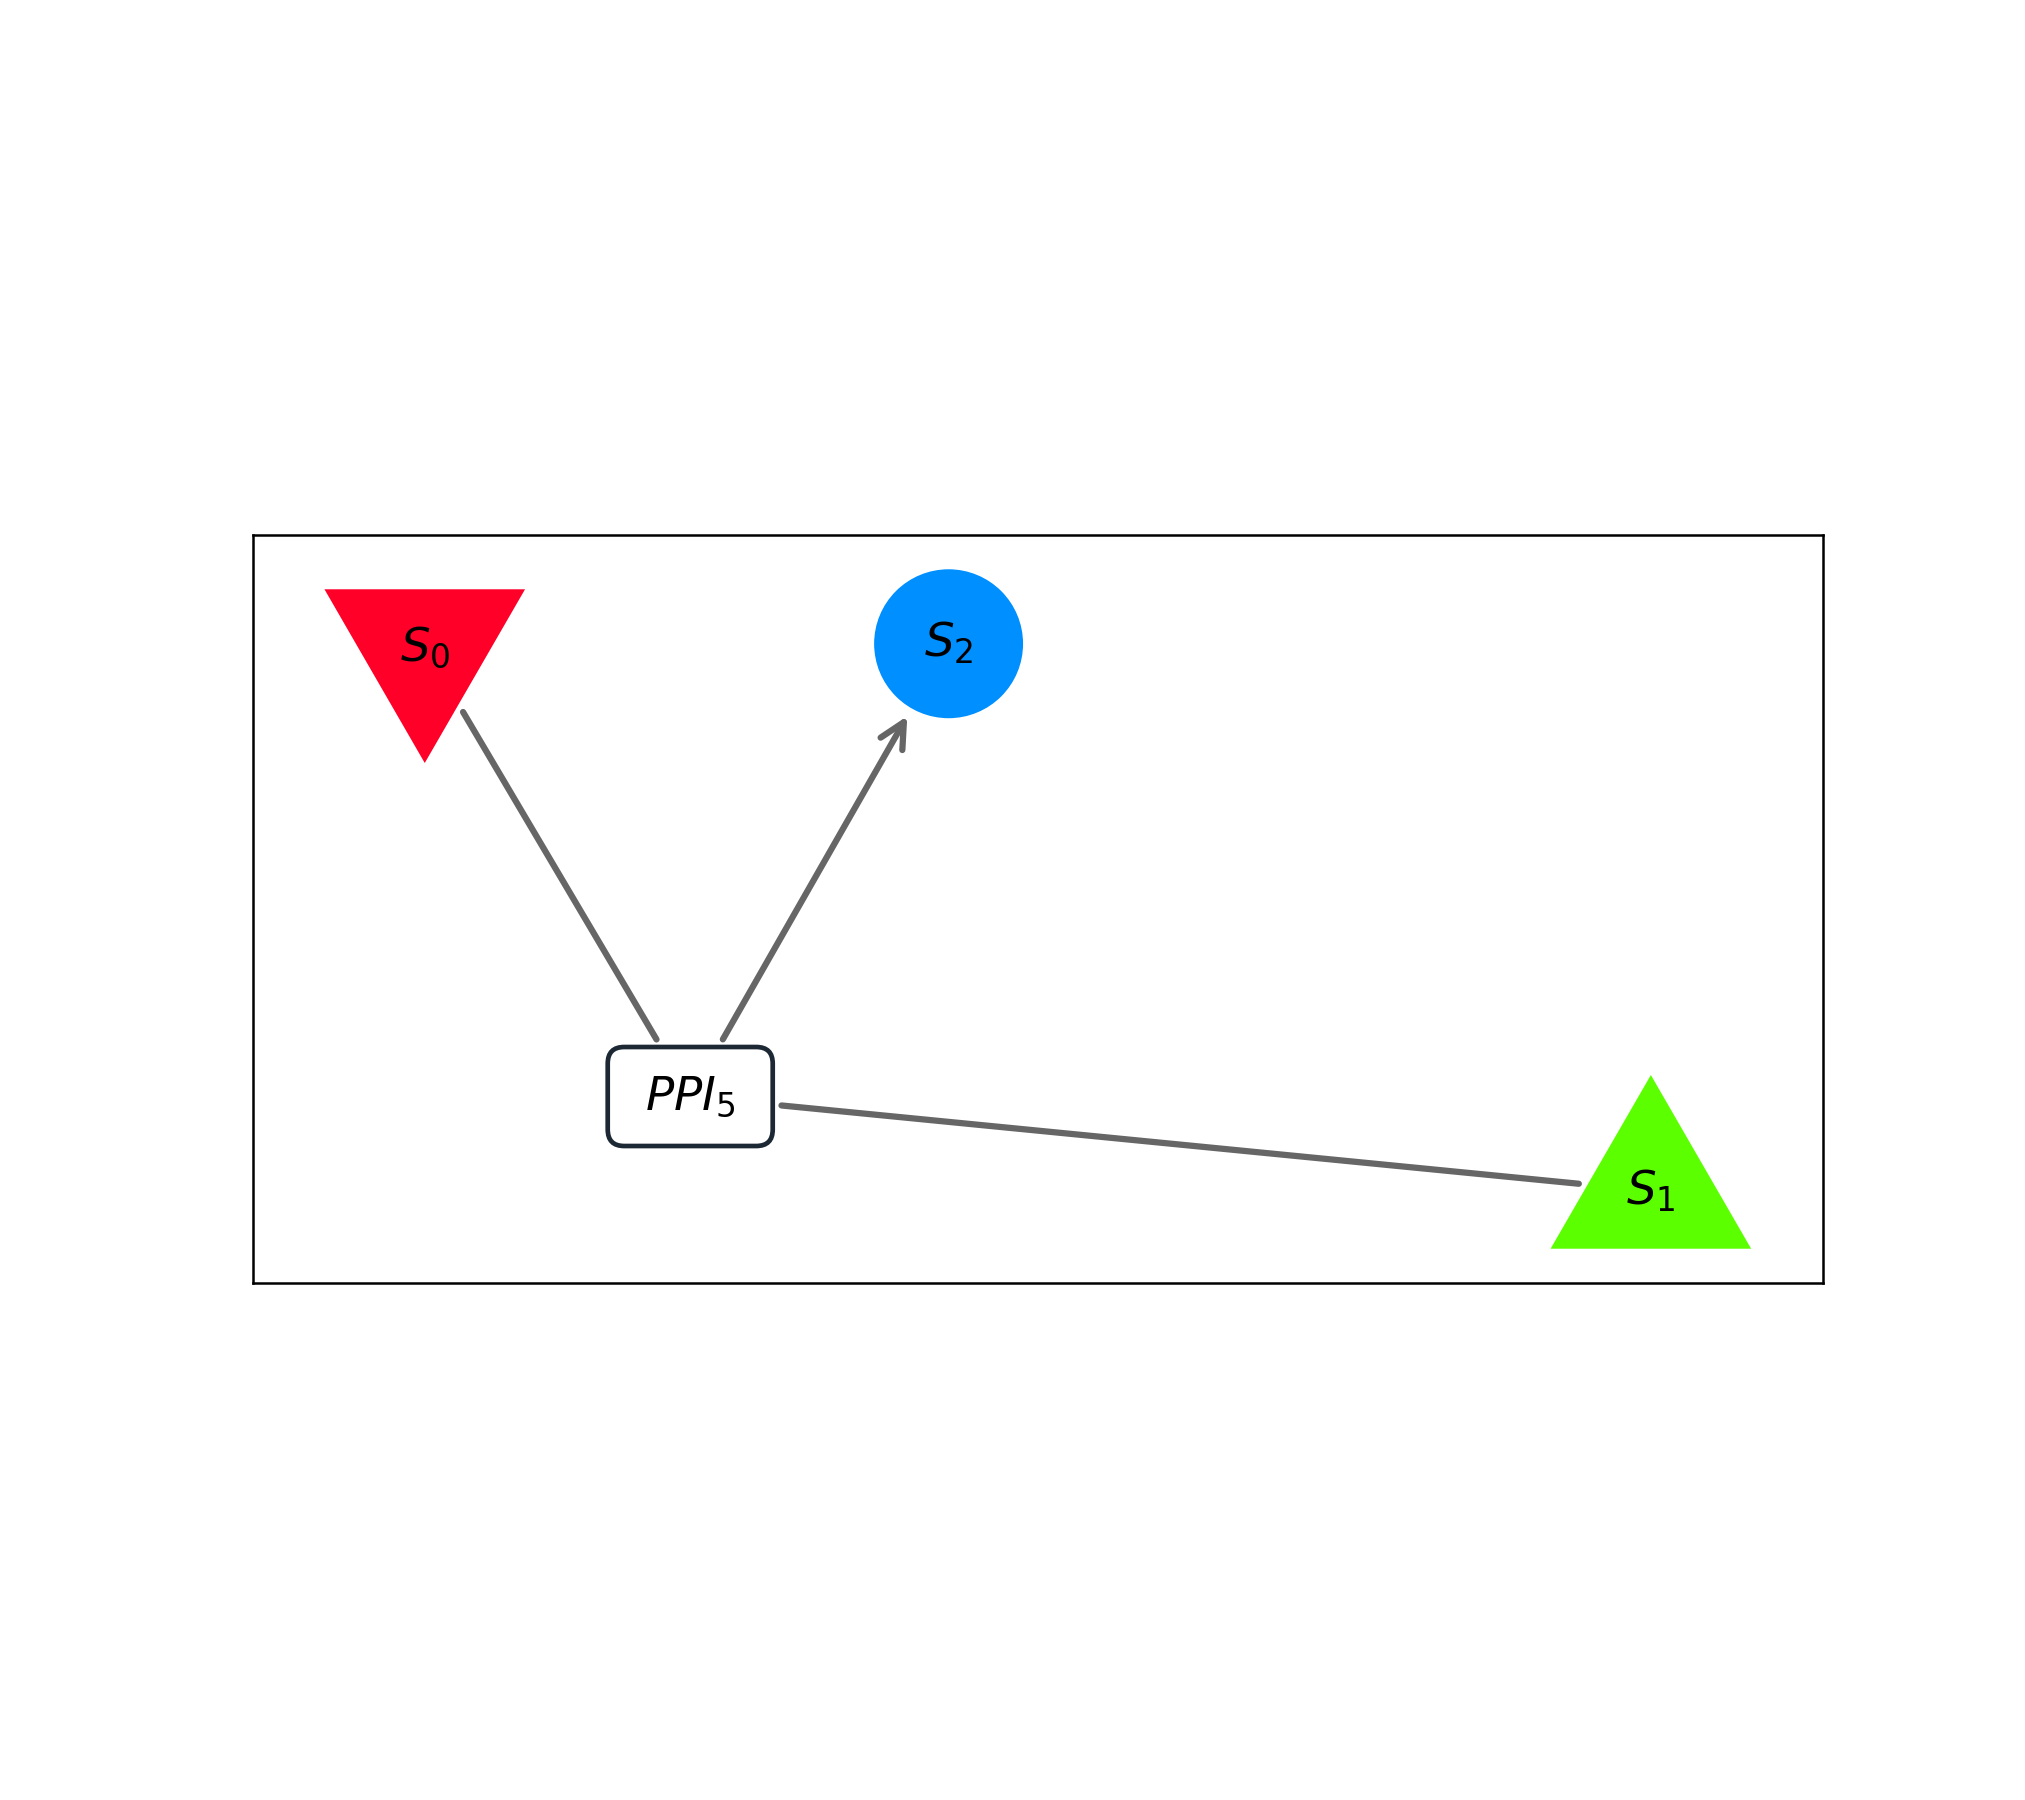

<IPython.core.display.Javascript object>


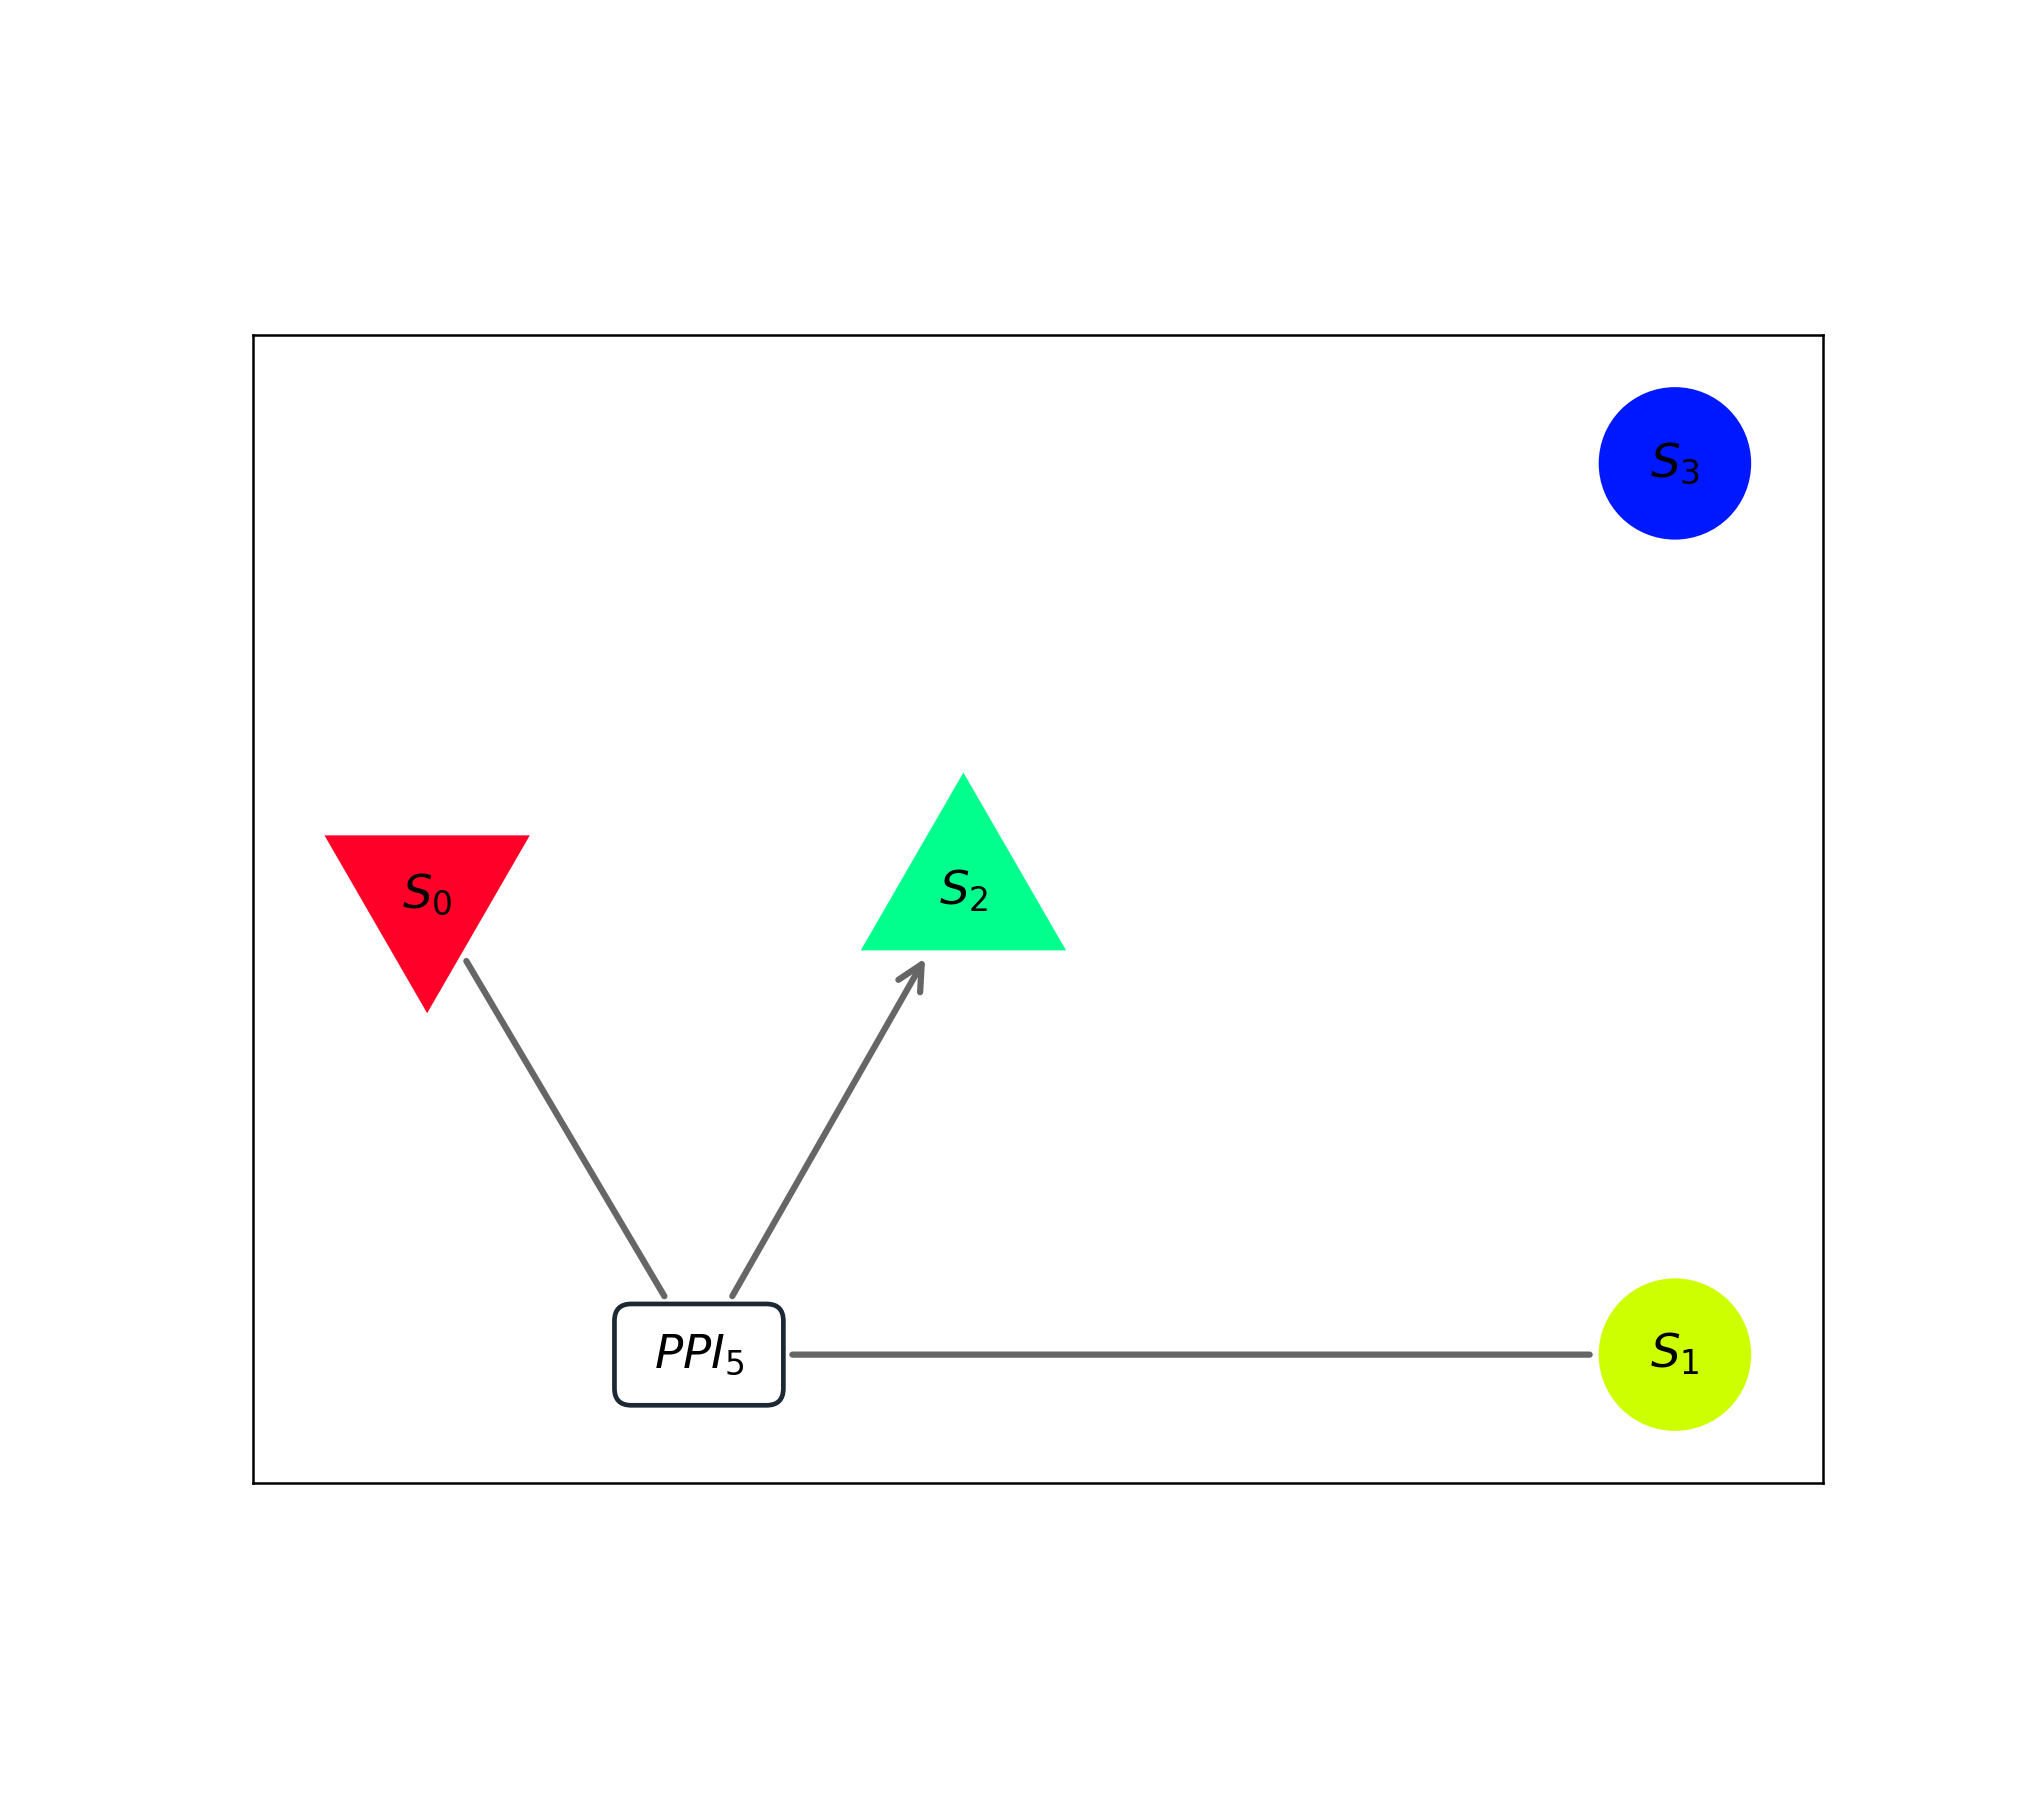

In [17]:
for i in range(10):
    net = sim.get_best_net(0,i+270)
    img = net.draw()
bestnet_g5_seed0 = sim.get_best_net(0,5)
img = bestnet_g5_seed0.draw()
img.savefig('g5s0.png')
img2 = best_net_0_150.draw()

## Run Dynamics

In [ ]:
notebook.run_dynamics.display()

## Plot Cell Profile

In [ ]:
notebook.plot_cell_profile.display()

## Plot Dynamics

In [ ]:
notebook.plot_dynamics.display()

## Save network

In [ ]:
notebook.save_network.display()